In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [6]:
df = pd.read_excel('df.xlsx')
df

,review_dttm,finish_dttm,id_client,company,review_mark,review_emotion,review_source,business_line,product,reason,review_theme,subtheme,review_text,solution_flg,gender_cd,education_level_cd,marital_status_cd,children_cnt,citizenship_country,segment_name,subscription_important_flg,new_flg,influencer_flg,age_segment,csat_score
0,2025-02-18 15:41:00,2025-02-18 16:56:49.353,fb30834209a9c7f60612c64b82c75ffa,Банк,1,Негативный,banki.ru,кредитные карты,кредитная карта,Не определено,тарифы и условия,консультация по продукту,"Непрозрачные условия, скрытые комсисии. Почему...",проблема решена,M,NaN,UNM,0.0,РФ,Доходные,0.0,0.0,0.0,Молодежь,NaN
1,2025-03-24 20:06:00,2025-03-28 17:42:39.772,6601bfab426e4f56cc1e44d859683763,Страховая,1,Негативный,banki.ru,страховая,каско,Не определено,страховое событие,жалоба по страховому случаю,"Обратился по каско , влетел камень в лобовое с...",проблема решена,M,NaN,NaN,NaN,РФ,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-07-08 07:40:43,2025-07-08 10:29:04.740,f1f8eff66eaf2289f61deec744871d6b,Банк,5,Позитивный,banki.ru,депозитные продукты,дебетовая карта,Не определено,мп/лк/терминал,установка/обновление приложения,Я уже очень давно пользуюсь услугами Тбанка и ...,не указано,M,GRD,MAR,0.0,РФ,Малодоходные,0.0,0.0,0.0,Взрослые,NaN
3,2025-08-07 22:51:48,2025-08-08 09:35:34.593,5ca669878eaf593f68c10e163246357b,SME,5,Позитивный,banki.ru,sme,расчетный счет,Не определено,дополнительные услуги,консультация по услуге,"Уважаемое руководство Т- Банка,\n\n\nНастоящим...",не указано,F,GRD,MAR,0.0,РФ,Высокодоходные без ПМ,0.0,0.0,1.0,Взрослые,NaN
4,2025-02-13 21:38:40,2025-02-14 08:04:44.643,7a436100b113ce78c8a7a02974521a16,Банк,5,Позитивный,banki.ru,депозитные продукты,дебетовая карта,Не определено,кэшбек,корректировка кэшбека,Выбрал на текущий месяц повышенный кэшбек на к...,не указано,M,NaN,NaN,0.0,РФ,Доходные,0.0,0.0,1.0,Сеньоры,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56815,2025-05-23 18:29:43,2025-05-23 19:25:21.222,19a90f722e0088dbd5c1140326475d4c,Страховая,5,Позитивный,banki.ru,страховая,взр,Не определено,страховое событие,консультации по существующему страховому событию,Отдыхали в новый год в Тель-Авиве с ребёнком. ...,не указано,M,NaN,DIV,0.0,РФ,NaN,NaN,NaN,NaN,NaN,NaN
56816,2025-09-26 10:16:00,2025-09-26 13:27:02.360,3e5ccb5ffa7055f82085ccd18b7190c4,Банк,5,Позитивный,sravni.ru,поддержка сотрудников,не определено,Не определено,тарифы и условия,консультация по продукту,Здравствуйте я очень довольна работой группы п...,не указано,F,GRD,CIV,0.0,РФ,Доходные,0.0,0.0,0.0,Сеньоры,NaN
56817,2025-10-23 18:41:00,2025-10-23 19:20:28.205,ff8dee14ae0b2c22593ab20ffb9d8e26,Банк,5,Позитивный,sravni.ru,депозитные продукты,дебетовая карта,Не определено,мп/лк/терминал,консультация по интерфейсу,Банк и прилодение\nПо моему мнению лучший банк...,не указано,M,NaN,MAR,0.0,РФ,Доходные,0.0,0.0,0.0,Взрослые,NaN
56818,2025-09-02 13:12:13,2025-09-02 13:35:01.523,b8deb649421f64fc4a5b6c71b350f528,Банк,5,Позитивный,banki.ru,премиальные сервисы,premium,Не определено,"платежи, переводы и операции",отмена / оспаривание,Огромная благодарность сотруднику Т-Банка (Лео...,не указано,M,NaN,NaN,0.0,РФ,Доходные,0.0,0.0,1.0,Взрослые,NaN


In [7]:
product_map = {
    'дебетовая карта': 'дебетовые карты',
    'дебетовая карта (black)': 'дебетовые карты',
    'tinkoff black': 'дебетовые карты',
    'tinkoff black premium': 'premium',
    'премиальные сервисы': 'premium',
    'кредит наличными (кн)': 'кредит наличными',
    'collection': 'кредит наличными',

    'Не определено': 'не определено',

    'вклады': 'вклад',
    'депозит': 'вклад',
    'нс': 'накопительный счет',

    'кредиты': 'кредит наличными',
    'кредит на покупку': 'кредит наличными',
    'образовательный кредит': 'кредит наличными',
    'кредит наличными под залог недвижимости': 'кредит наличными',
    'кредит наличными под залог авто': 'кредит наличными',
    'кредит наличными на образование': 'кредит наличными',
    'кредитование покупателей': 'кредит наличными',
    'рефинансирование': 'кредит наличными',
    'рефинансирование кн': 'кредит наличными',

    'ипотека на вторичном рынке': 'ипотека',
    'ипотека на первичном рынке': 'ипотека',
    'ипотечное страхование': 'ипотека',
    'рефинансирование ипотеки': 'ипотека',
    'рефинансирование ипотеки для сотрудника': 'ипотека',
    'рефинансирование автокредита': 'ипотека',

    'путешествия': 'lifestyle',
    'бизнес-залы': 'lifestyle',
    'отели': 'lifestyle',
    'выгода': 'lifestyle',
    'рассрочка по кнопке': 'lifestyle',
    'консьерж': 'lifestyle',
    'bravo': 'lifestyle',
    'sim': 'lifestyle',

    'интернет эквайринг': 'торговый эквайринг',
    'онлайн-касса': 'торговый эквайринг',
    'рко': 'расчетный счет',
    'зарплатный проект': 'расчетный счет',
    'самозанятые': 'расчетный счет',
    'вэд': 'расчетный счет',
    'инвестиции для бизнеса': 'расчетный счет',
    'бухгалтерское обслуживание': 'онлайн-бухгалтерия',

    'private': 'premium',
    'junior': 'дебетовые карты',
    'совместный счет': 'дебетовые карты',
}

df['product'] = df['product'].replace(product_map)

In [8]:
df['product'].value_counts()

product
дебетовые карты         18739
premium                  6572
взр                      4732
не определено            4108
брокерский счет          4027
расчетный счет           3674
осаго                    3074
кредитная карта          3064
кредит наличными         1534
каско                    1500
мобайл                    778
lifestyle                 694
онлайн-бухгалтерия        646
торговый эквайринг        595
автокредит в салонах      513
подписки                  471
ифл                       340
иис                       338
автокредит наличными      320
вклад                     275
ипотека                   253
банкоматы                 155
накопительный счет        126
долями                    119
кубышка                    68
инвесткопилка              63
бизнес-карта               35
овернайт                    7
Name: count, dtype: int64

In [9]:
df["review_emotion"] = df["review_emotion"].replace("Позитивный", 1)
df["review_emotion"] = df["review_emotion"].replace("Негативный", 0)
df["children_cnt"] = df['children_cnt'].fillna(0)

/var/folders/28/5cy4n6bn35n79ymr5smj3v7h0000gn/T/ipykernel_15140/2405201864.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["review_emotion"] = df["review_emotion"].replace("Негативный", 0)


In [10]:
product_stats = (
    df.groupby('product')['review_emotion']
      .agg(share_positive='mean', count='size')
      .reset_index()
)
product_stats['share_negative'] = 1 - product_stats['share_positive']

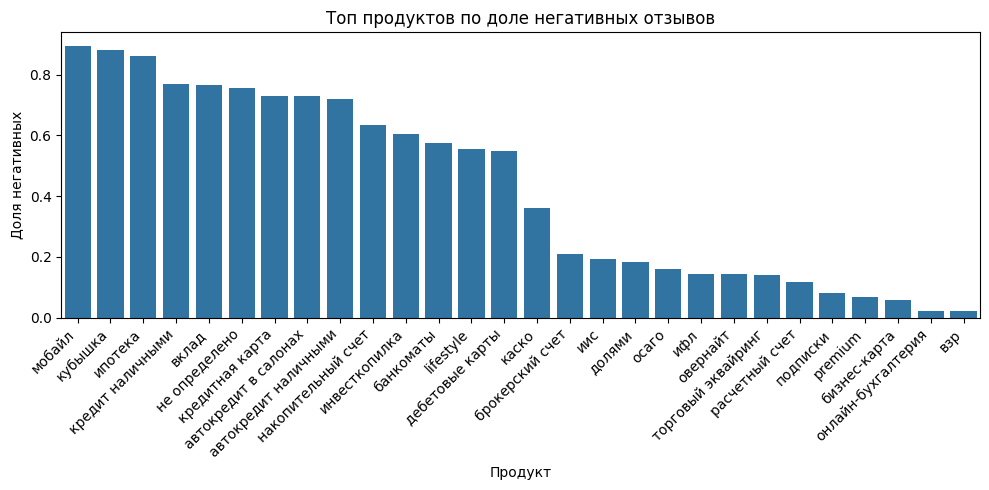

In [11]:
top_products = (
    product_stats
    .sort_values('share_negative', ascending=False)
)

plt.figure(figsize=(10, 5))
sns.barplot(
    data=top_products,
    x='product',
    y='share_negative'
)
plt.title(f'Топ продуктов по доле негативных отзывов')
plt.xlabel('Продукт')
plt.ylabel('Доля негативных')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


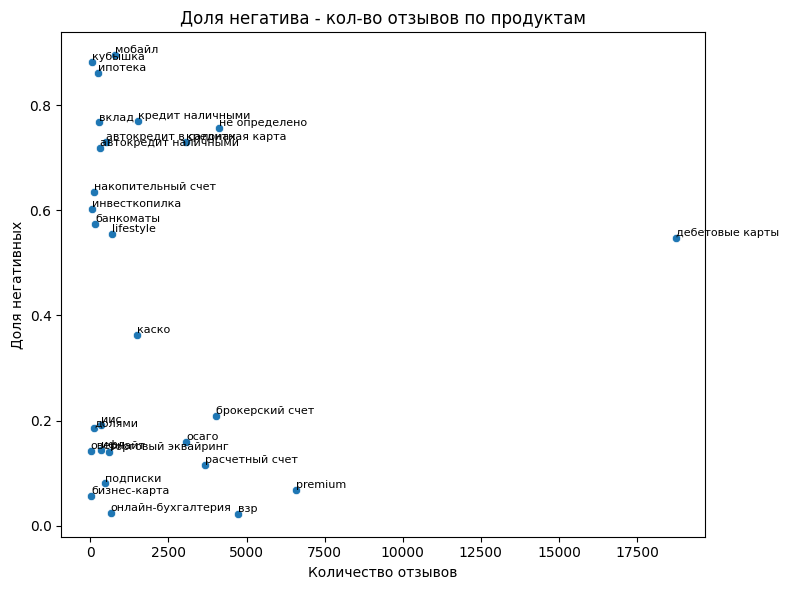

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=product_stats,
    x='count',
    y='share_negative'
)

for _, row in product_stats.iterrows():
    plt.text(
        row['count'],
        row['share_negative'],
        row['product'],
        fontsize=8,
        ha='left',
        va='bottom'
    )

plt.xlabel('Количество отзывов')
plt.ylabel('Доля негативных')
plt.title('Доля негатива - кол-во отзывов по продуктам')
plt.tight_layout()
plt.show()


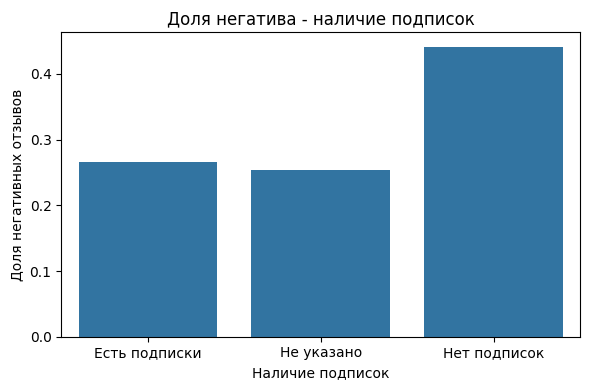

,subscription_flg,share_positive,count,share_negative
0,Есть подписки,0.733373,1684,0.266627
1,Не указано,0.746745,13212,0.253255
2,Нет подписок,0.558654,41924,0.441346


In [13]:
df['subscription_flg'] = df['subscription_important_flg'].map({
    1.0: 'Есть подписки',
    0.0: 'Нет подписок'
})
df['subscription_flg'] = df['subscription_flg'].fillna('Не указано')

sub_stats = (
    df.groupby('subscription_flg')['review_emotion']
      .agg(share_positive='mean', count='size')
      .reset_index()
)
sub_stats['share_negative'] = 1 - sub_stats['share_positive']

plt.figure(figsize=(6, 4))
sns.barplot(
    data=sub_stats,
    x='subscription_flg',
    y='share_negative'
)
plt.xlabel('Наличие подписок')
plt.ylabel('Доля негативных отзывов')
plt.title('Доля негатива - наличие подписок')
plt.tight_layout()
plt.show()

sub_stats

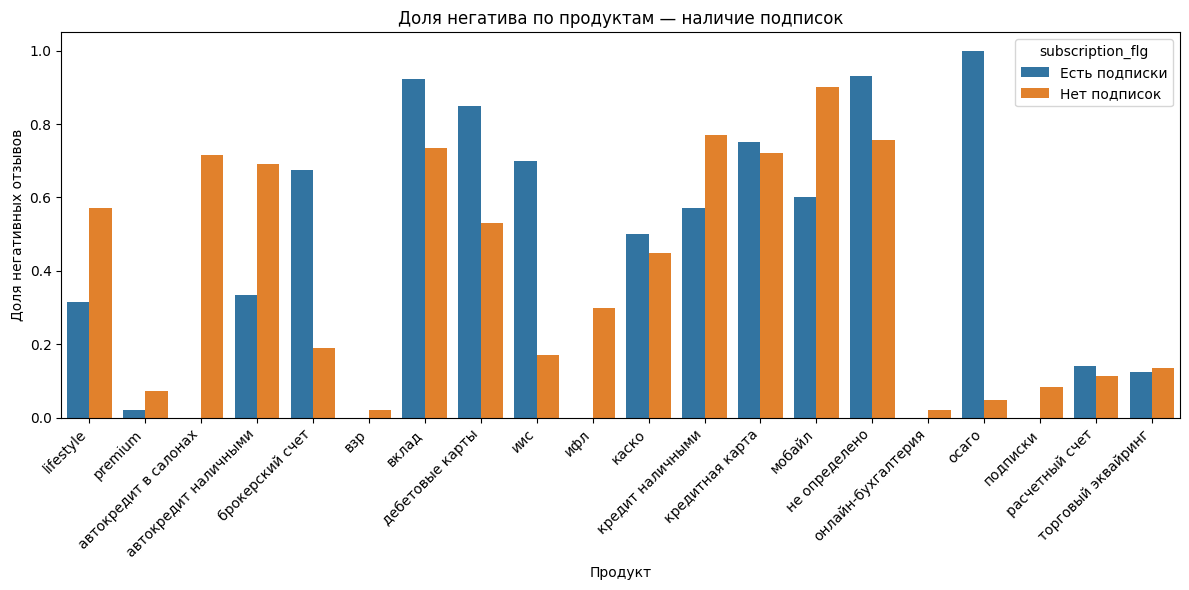

In [14]:
top_products = (
    df['product']
      .value_counts()
      .head(20)
      .index
)

subset = df[df['product'].isin(top_products)].copy()

sub_prod_stats = (
    subset.groupby(['product', 'subscription_flg'])['review_emotion']
          .mean()
          .reset_index()
)
sub_prod_stats['share_negative'] = 1 - sub_prod_stats['review_emotion']

sub_prod_stats_no_na = sub_prod_stats[sub_prod_stats['subscription_flg'] != 'Не указано']

plt.figure(figsize=(12, 6))
sns.barplot(
    data=sub_prod_stats_no_na,
    x='product',
    y='share_negative',
    hue='subscription_flg'
)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Продукт')
plt.ylabel('Доля негативных отзывов')
plt.title('Доля негатива по продуктам — наличие подписок')
plt.tight_layout()
plt.show()


,reason,count
0,Не определено,8759
1,блокировка/разблокировка карты,135
2,ограничение операций,94
3,документы,83
4,акции,79
5,оспаривание операций,68
6,кэшбэк,56
7,общая информация,53
8,обработка обращений по запросу документов фл aml,52
9,встречи,47


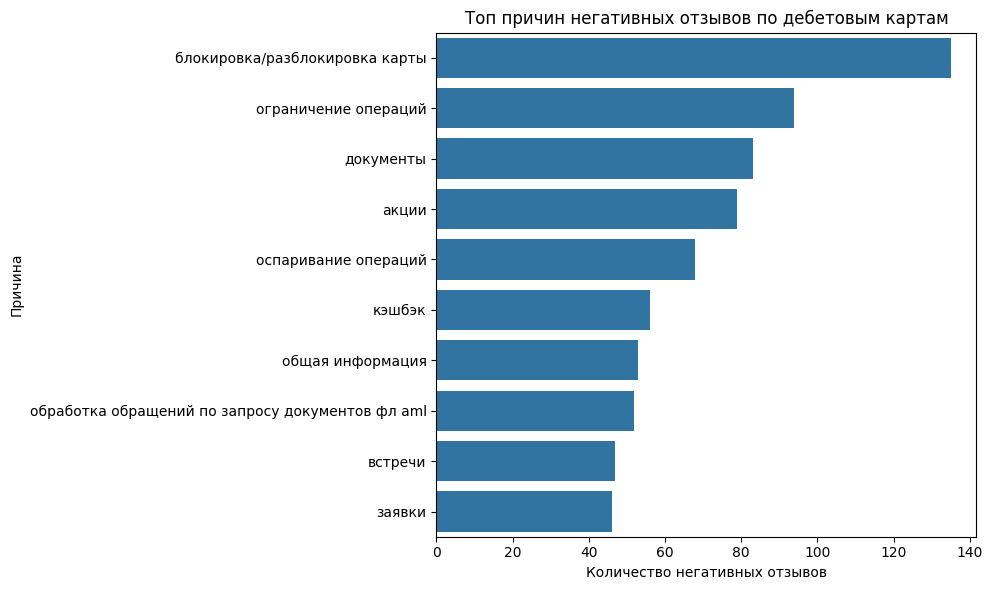

In [15]:
dc_neg = df[
    (df['product'] == 'дебетовые карты') &
    (df['review_emotion'] == 0)
].copy()

reason_stats = (
    dc_neg['reason']
    .fillna('Не определено')
    .value_counts()
    .reset_index(name='count')
    .rename(columns={'index': 'reason'})
)

display(reason_stats.head(20))

top_reason_stats = reason_stats[reason_stats['reason'] != 'Не определено'].head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_reason_stats,
    y='reason',
    x='count'
)
plt.xlabel('Количество негативных отзывов')
plt.ylabel('Причина')
plt.title('Топ причин негативных отзывов по дебетовым картам')
plt.tight_layout()
plt.show()

In [16]:
neg_counts = (
    df[df['review_emotion'] == 0]
    .groupby('product')
    .size()
    .reset_index(name='negative_count')
    .sort_values('negative_count', ascending=False)
)

display(neg_counts)


,product,negative_count
9,дебетовые карты,10256
21,не определено,3109
17,кредитная карта,2238
16,кредит наличными,1181
6,брокерский счет,841
19,мобайл,696
15,каско,543
24,осаго,490
1,premium,450
26,расчетный счет,427


In [ ]:
# УЛУЧШЕННАЯ функция категоризации продуктов
def product_kind(p):
    # Кредитные продукты
    if p in ['кредитная карта', 'кредит наличными', 'автокредит в салонах', 'автокредит', 'ипотека', 'автокредит наличными']:
        return 'кредитный'
    
    # Транзакционные продукты
    if p in ['дебетовые карты', 'расчетный счет']:
        return 'транзакционный'
    
    # Накопительные/инвестиционные
    if p in ['вклад', 'накопительный счет', 'брокерский счет', 'инвесткопилка', 'иис', 'долями']:
        return 'накопительный/инвест'
    
    # Страховые продукты
    if p in ['осаго', 'каско', 'взр']:
        return 'страхование'
    
    # Premium сервисы
    if p in ['premium', 'подписки']:
        return 'premium сервисы'
    
    # Бизнес-продукты
    if p in ['онлайн-бухгалтерия', 'торговый эквайринг', 'бизнес-карта', 'ифл']:
        return 'для бизнеса'
    
    # Lifestyle и другие сервисы
    if p in ['lifestyle', 'мобайл']:
        return 'lifestyle/доп.сервисы'
    
    # Остальное
    return 'прочее'

df['product_kind'] = df['product'].map(product_kind)

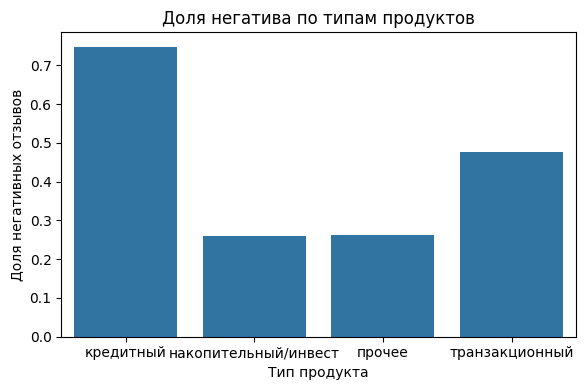

In [18]:
kind_stats = (
    df.groupby('product_kind')['review_emotion']
      .mean()
      .reset_index()
)
kind_stats['share_negative'] = 1 - kind_stats['review_emotion']

plt.figure(figsize=(6, 4))
sns.barplot(
    data=kind_stats,
    x='product_kind',
    y='share_negative'
)
plt.xlabel('Тип продукта')
plt.ylabel('Доля негативных отзывов')
plt.title('Доля негатива по типам продуктов')
plt.tight_layout()
plt.show()


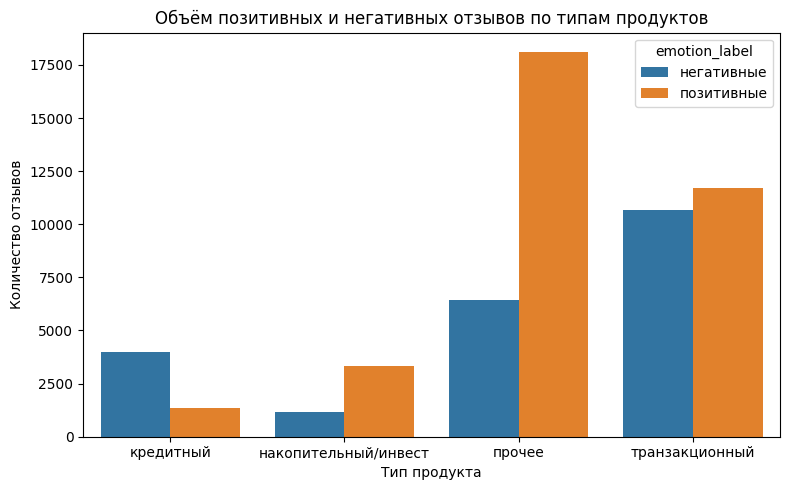

In [19]:
kind_emotion = (
    df.groupby(['product_kind', 'review_emotion'])
      .size()
      .reset_index(name='count')
)

kind_emotion['emotion_label'] = kind_emotion['review_emotion'].map({
    0: 'негативные',
    1: 'позитивные'
})

plt.figure(figsize=(8, 5))
sns.barplot(
    data=kind_emotion,
    x='product_kind',
    y='count',
    hue='emotion_label'
)
plt.xlabel('Тип продукта')
plt.ylabel('Количество отзывов')
plt.title('Объём позитивных и негативных отзывов по типам продуктов')
plt.tight_layout()
plt.show()

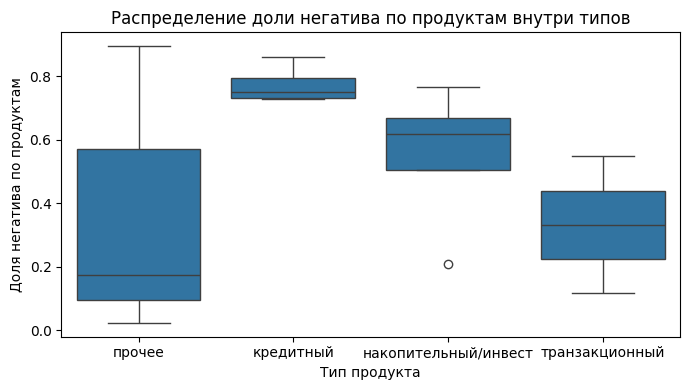

,product,product_kind,share_positive,count,share_negative
19,мобайл,прочее,0.105398,778,0.894602
18,кубышка,прочее,0.117647,68,0.882353
13,ипотека,кредитный,0.138340,253,0.861660
16,кредит наличными,кредитный,0.230117,1534,0.769883
8,вклад,накопительный/инвест,0.232727,275,0.767273
21,не определено,прочее,0.243184,4108,0.756816
17,кредитная карта,кредитный,0.269582,3064,0.730418
2,автокредит в салонах,кредитный,0.270955,513,0.729045
3,автокредит наличными,прочее,0.281250,320,0.718750
20,накопительный счет,накопительный/инвест,0.365079,126,0.634921


In [20]:
prod_stats = (
    df.groupby(['product', 'product_kind'])['review_emotion']
      .agg(share_positive='mean', count='size')
      .reset_index()
)
prod_stats['share_negative'] = 1 - prod_stats['share_positive']

plt.figure(figsize=(7, 4))
sns.boxplot(
    data=prod_stats,
    x='product_kind',
    y='share_negative'
)
plt.xlabel('Тип продукта')
plt.ylabel('Доля негатива по продуктам')
plt.title('Распределение доли негатива по продуктам внутри типов')
plt.tight_layout()
plt.show()

prod_stats.sort_values('share_negative', ascending=False).head(10)


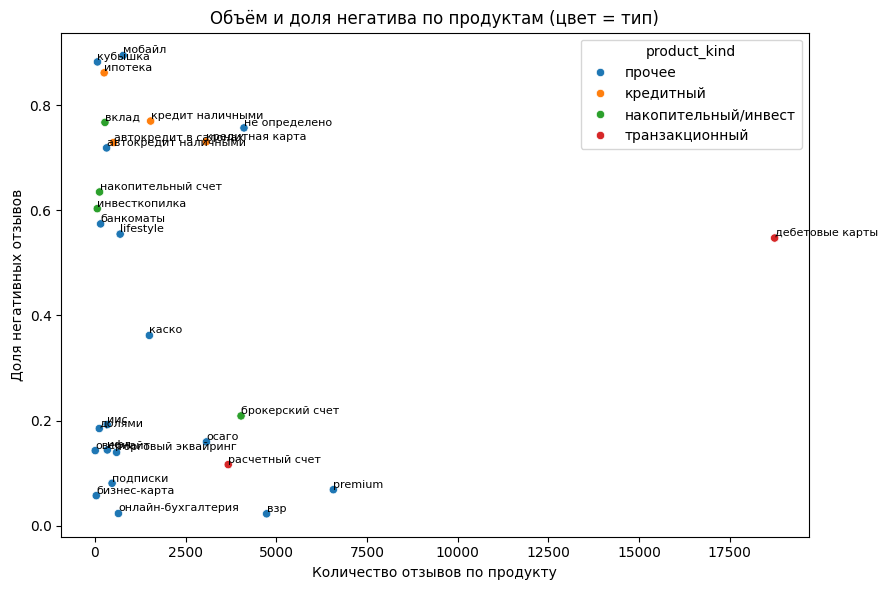

In [21]:
plt.figure(figsize=(9, 6))
sns.scatterplot(
    data=prod_stats,
    x='count',
    y='share_negative',
    hue='product_kind'
)

for _, row in (
    prod_stats
    .sort_values(['share_negative', 'count'], ascending=[False, False])
    .iterrows()
):
    plt.text(
        row['count'],
        row['share_negative'],
        row['product'],
        fontsize=8,
        ha='left',
        va='bottom'
    )

plt.xlabel('Количество отзывов по продукту')
plt.ylabel('Доля негативных отзывов')
plt.title('Объём и доля негатива по продуктам (цвет = тип)')
plt.tight_layout()
plt.show()


## Углубленный анализ негативных отзывов по категориям продуктов

In [22]:
# Определим топ категорий продуктов с наибольшей долей негатива
top_negative_kinds = kind_stats.sort_values('share_negative', ascending=False)
display(top_negative_kinds)

,product_kind,review_emotion,share_negative
0,кредитный,0.252237,0.747763
3,транзакционный,0.523357,0.476643
2,прочее,0.737944,0.262056
1,накопительный/инвест,0.739479,0.260521



Категория: кредитный

Продукты в категории 'кредитный' по доле негатива:


,product,share_negative,count
13,ипотека,0.861660,253
16,кредит наличными,0.769883,1534
17,кредитная карта,0.730418,3064
2,автокредит в салонах,0.729045,513


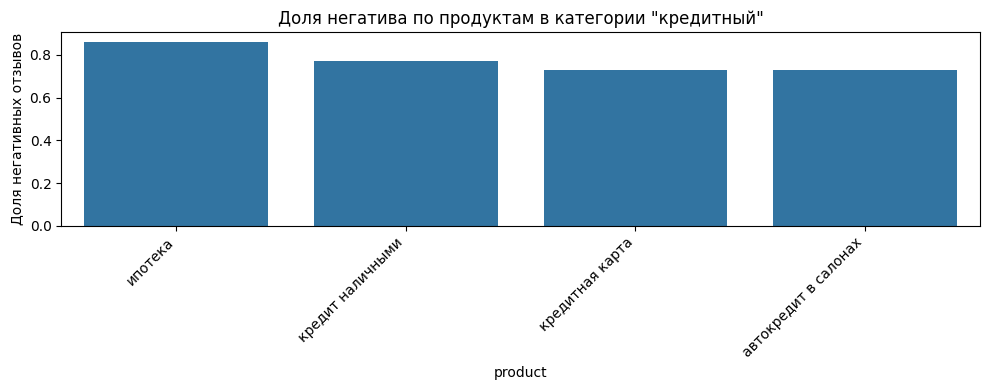


Категория: транзакционный

Продукты в категории 'транзакционный' по доле негатива:


,product,share_negative,count
9,дебетовые карты,0.547308,18739
26,расчетный счет,0.116222,3674


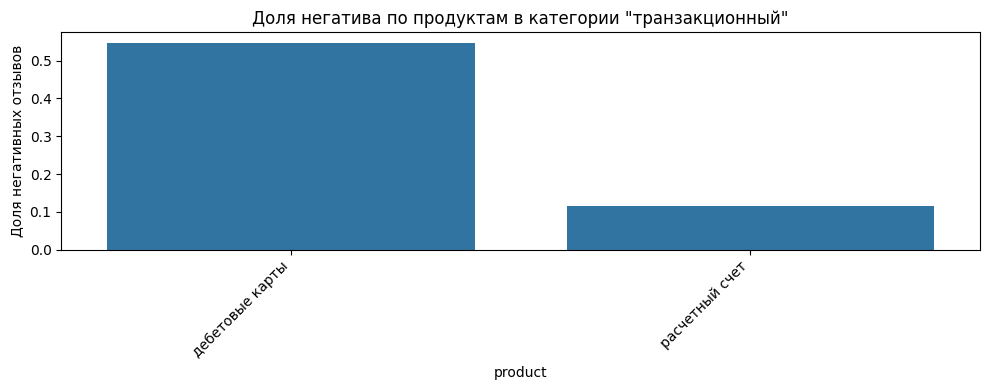


Категория: прочее

Продукты в категории 'прочее' по доле негатива:


,product,share_negative,count
19,мобайл,0.894602,778
18,кубышка,0.882353,68
21,не определено,0.756816,4108
3,автокредит наличными,0.718750,320
4,банкоматы,0.574194,155
0,lifestyle,0.554755,694
15,каско,0.362000,1500
11,иис,0.192308,338
10,долями,0.184874,119
24,осаго,0.159401,3074


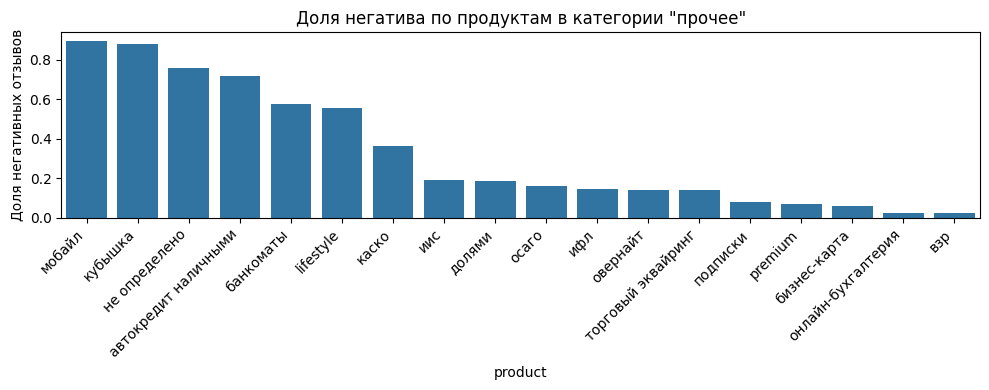


Категория: накопительный/инвест

Продукты в категории 'накопительный/инвест' по доле негатива:


,product,share_negative,count
8,вклад,0.767273,275
20,накопительный счет,0.634921,126
12,инвесткопилка,0.603175,63
6,брокерский счет,0.208840,4027


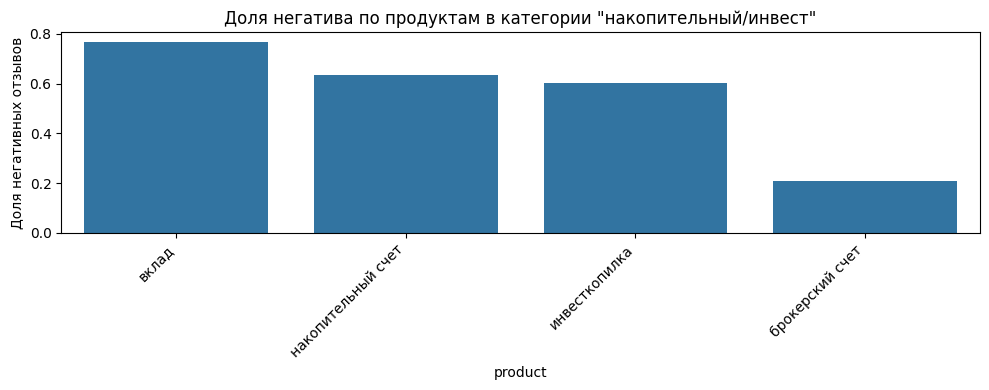

In [23]:
# Для каждой категории с высоким негативом посмотрим на конкретные продукты
for kind in kind_stats.sort_values('share_negative', ascending=False)['product_kind']:
    print(f"\n{'='*60}")
    print(f"Категория: {kind}")
    print(f"{'='*60}")
    
    # Фильтруем продукты этой категории
    kind_products = prod_stats[prod_stats['product_kind'] == kind].copy()
    kind_products = kind_products.sort_values('share_negative', ascending=False)
    
    print(f"\nПродукты в категории '{kind}' по доле негатива:")
    display(kind_products[['product', 'share_negative', 'count']])
    
    # Визуализация
    if len(kind_products) > 1:
        plt.figure(figsize=(10, 4))
        sns.barplot(
            data=kind_products,
            x='product',
            y='share_negative'
        )
        plt.xticks(rotation=45, ha='right')
        plt.title(f'Доля негатива по продуктам в категории "{kind}"')
        plt.ylabel('Доля негативных отзывов')
        plt.tight_layout()
        plt.show()

### Анализ тем (причин) негативных отзывов по категориям


Топ причин негатива в категории: кредитный


,reason,count,share
0,Не определено,3267,81.451010
1,финансовая информация,103,2.567938
2,общая информация,102,2.543007
3,заявки,88,2.193967
4,повторное обращение,29,0.723012
5,расторжение договора,28,0.698080
6,досрочное погашение,28,0.698080
7,документы,26,0.648217
8,тарифы,25,0.623286
9,отсрочка платежа и реструктуризация долга,25,0.623286


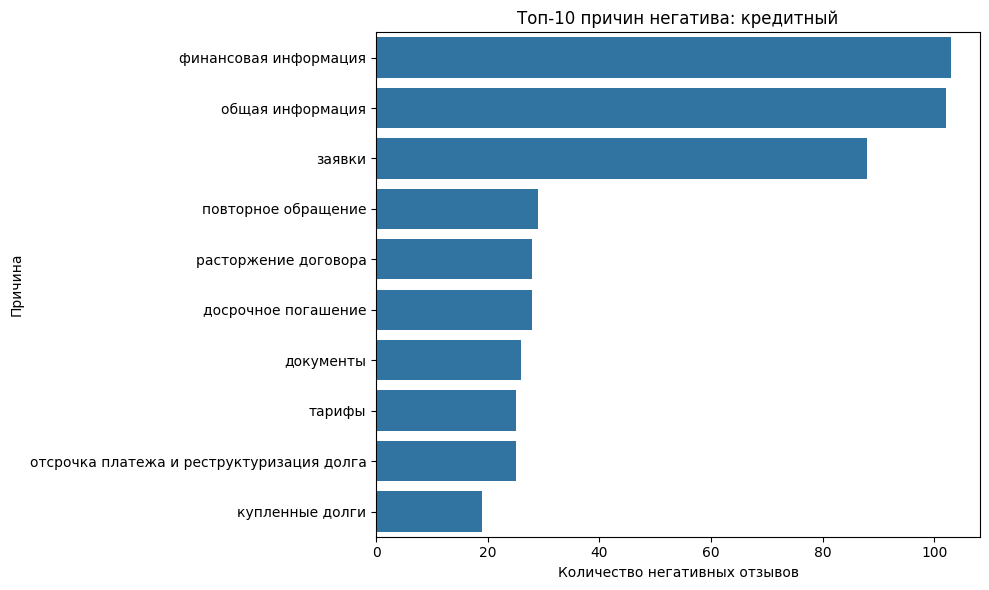


Топ причин негатива в категории: транзакционный


,reason,count,share
0,Не определено,8839,82.738931
1,блокировка/разблокировка карты,135,1.263690
2,общая информация,103,0.964149
3,документы,97,0.907985
4,ограничение операций,94,0.879903
5,акции,83,0.776935
6,aml,70,0.655247
7,оспаривание операций,68,0.636525
8,запрос документов aml,68,0.636525
9,приложение и сайт тинькофф,62,0.580361


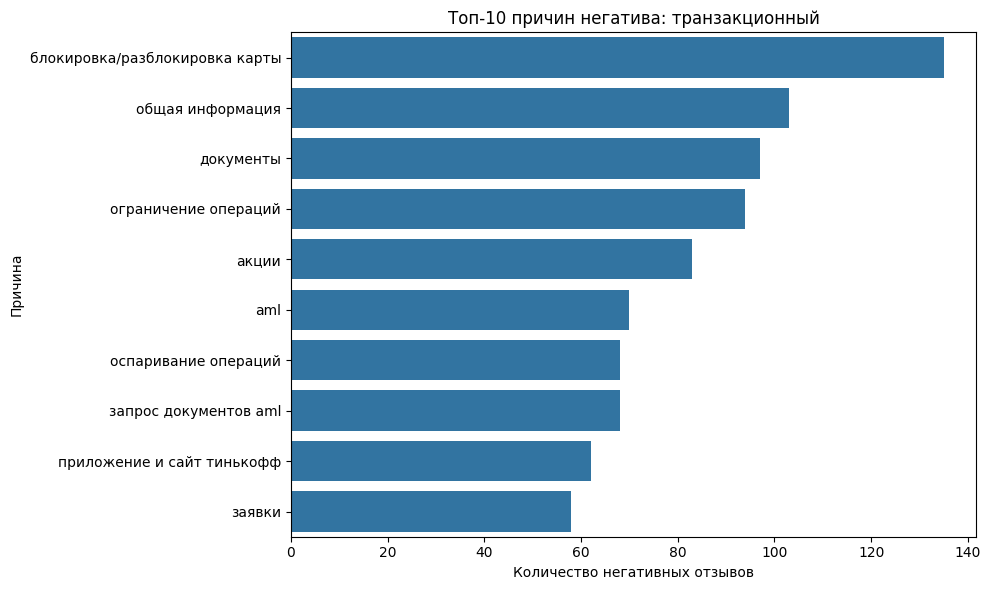


Топ причин негатива в категории: прочее


,reason,count,share
0,Не определено,4954,76.997202
1,акции,101,1.569786
2,общая информация,94,1.460988
3,качество связи,67,1.041343
4,заявки,59,0.917003
5,финансовая информация,55,0.854834
6,тарификация мобайл,54,0.839291
7,повторное обращение,51,0.792664
8,равнодушие,43,0.668325
9,продукты по инвестициям,37,0.575070


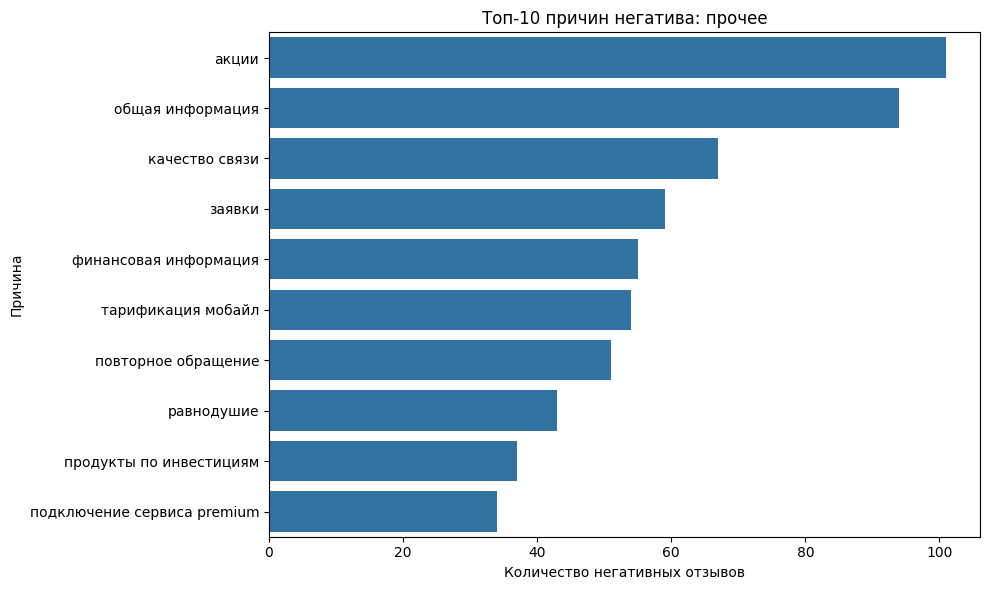


Топ причин негатива в категории: накопительный/инвест


,reason,count,share
0,Не определено,905,77.350427
1,акции,26,2.222222
2,продукты по инвестициям,26,2.222222
3,неверная консультация,22,1.880342
4,совершение сделок,22,1.880342
5,долго решали вопрос,13,1.111111
6,заявки,10,0.854701
7,общая информация,10,0.854701
8,не выполнены действия,10,0.854701
9,тарифы по депозитным продуктам,9,0.769231


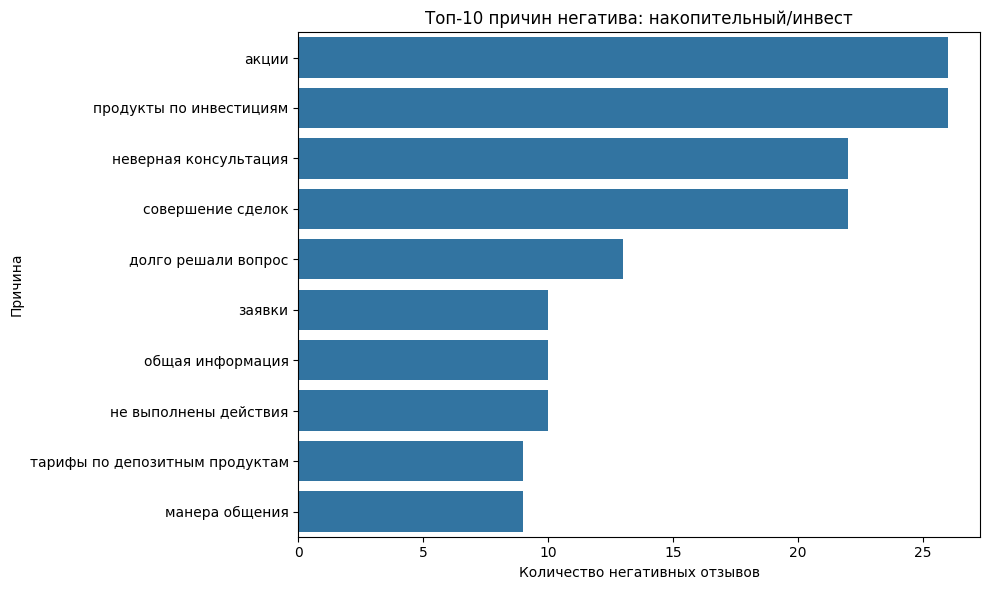

In [24]:
# Анализ причин негативных отзывов по каждой категории продуктов
for kind in kind_stats.sort_values('share_negative', ascending=False)['product_kind']:
    print(f"\n{'='*60}")
    print(f"Топ причин негатива в категории: {kind}")
    print(f"{'='*60}")
    
    # Фильтруем негативные отзывы этой категории
    kind_negative = df[
        (df['product_kind'] == kind) & 
        (df['review_emotion'] == 0)
    ].copy()
    
    if len(kind_negative) == 0:
        print("Нет негативных отзывов")
        continue
    
    # Статистика по причинам
    reason_counts = (
        kind_negative['reason']
        .fillna('Не определено')
        .value_counts()
        .head(15)
        .reset_index(name='count')
    )
    
    reason_counts['share'] = reason_counts['count'] / len(kind_negative) * 100
    
    display(reason_counts)
    
    # Визуализация топ-10 причин (кроме "Не определено")
    top_reasons_viz = reason_counts[reason_counts['reason'] != 'Не определено'].head(10)
    
    if len(top_reasons_viz) > 0:
        plt.figure(figsize=(10, 6))
        sns.barplot(
            data=top_reasons_viz,
            y='reason',
            x='count'
        )
        plt.xlabel('Количество негативных отзывов')
        plt.ylabel('Причина')
        plt.title(f'Топ-10 причин негатива: {kind}')
        plt.tight_layout()
        plt.show()

### Детальный анализ по конкретным проблемным продуктам

Топ-5 проблемных продуктов (с количеством отзывов >= 50):


,product,product_kind,share_positive,count,share_negative
19,мобайл,прочее,0.105398,778,0.894602
18,кубышка,прочее,0.117647,68,0.882353
13,ипотека,кредитный,0.138340,253,0.861660
16,кредит наличными,кредитный,0.230117,1534,0.769883
8,вклад,накопительный/инвест,0.232727,275,0.767273



Продукт: мобайл
Категория: прочее
Доля негатива: 89.46%
Количество отзывов: 778

Топ причин негатива по продукту 'мобайл':


,reason,count,share
0,Не определено,275,39.511494
1,качество связи,67,9.626437
2,тарификация мобайл,54,7.758621
3,акции,52,7.471264
4,заявки,32,4.597701
5,актуализация,23,3.304598
6,заблокировать сим-карту/разблокировать сим-карту,23,3.304598
7,равнодушие,22,3.160920
8,перенос номера,21,3.017241
9,встречи,16,2.298851


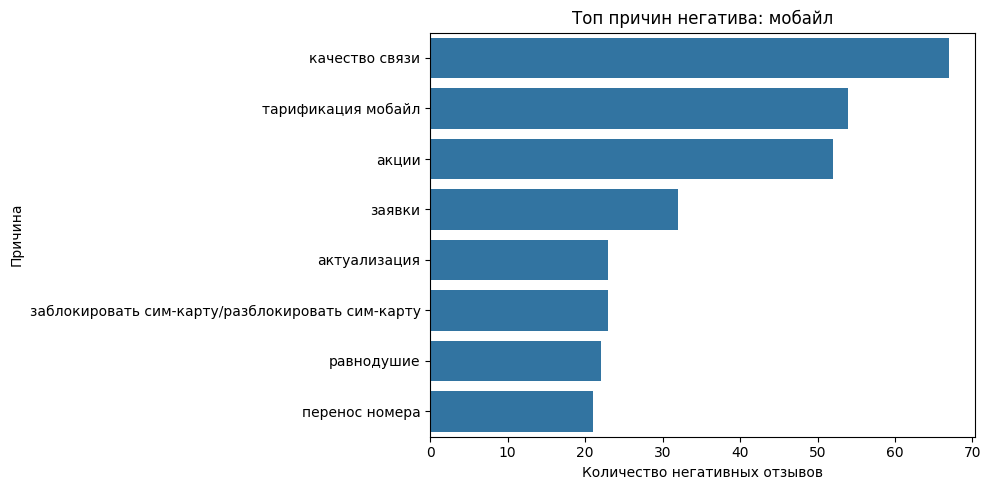


Продукт: кубышка
Категория: прочее
Доля негатива: 88.24%
Количество отзывов: 68

Топ причин негатива по продукту 'кубышка':


,reason,count,share
0,Не определено,52,86.666667
1,безакцептное списание,3,5.000000
2,платежи внешние,1,1.666667
3,общая информация,1,1.666667
4,тарифы по депозитным продуктам,1,1.666667
5,повторное обращение,1,1.666667
6,банкротство,1,1.666667


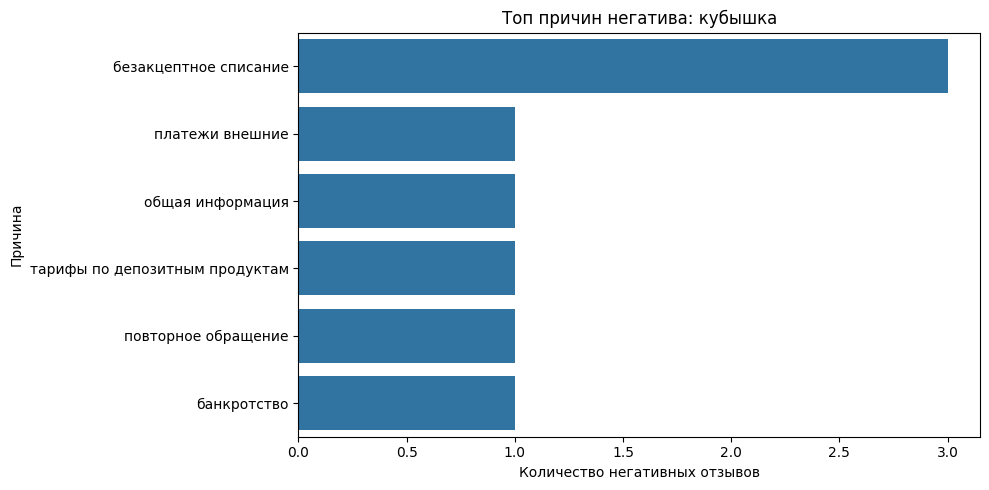


Продукт: ипотека
Категория: кредитный
Доля негатива: 86.17%
Количество отзывов: 253

Топ причин негатива по продукту 'ипотека':


,reason,count,share
0,Не определено,142,65.137615
1,общая информация,20,9.174312
2,заявки,16,7.339450
3,повторное обращение,12,5.504587
4,финансовая информация,4,1.834862
5,досрочное погашение,3,1.376147
6,купленные долги,2,0.917431
7,долго решали вопрос,2,0.917431
8,пополнение,2,0.917431
9,пополнения,1,0.458716


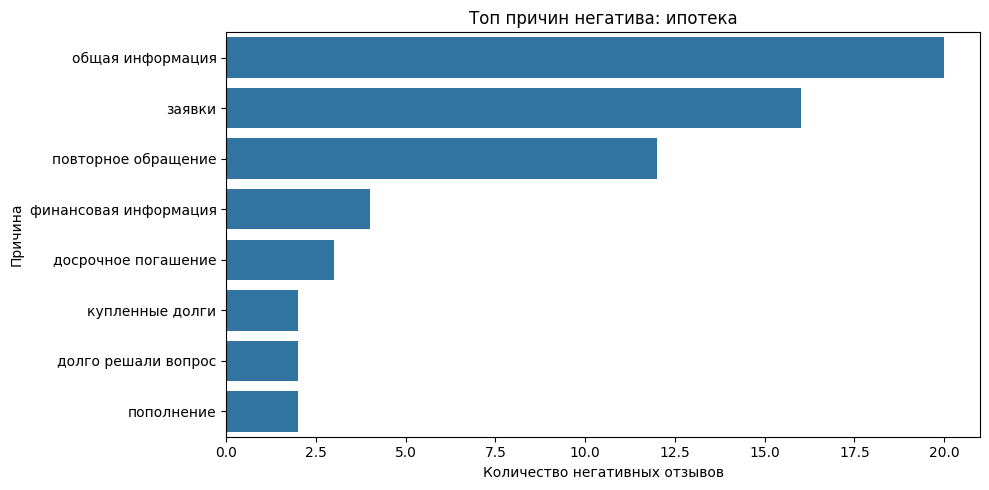


Продукт: кредит наличными
Категория: кредитный
Доля негатива: 76.99%
Количество отзывов: 1534

Топ причин негатива по продукту 'кредит наличными':


,reason,count,share
0,Не определено,927,78.492803
1,общая информация,36,3.048264
2,финансовая информация,36,3.048264
3,заявки,36,3.048264
4,купленные долги,14,1.185436
5,документы,13,1.100762
6,досрочное погашение,12,1.016088
7,тарифы,10,0.846740
8,отсрочка платежа и реструктуризация долга,10,0.846740
9,повторное обращение,8,0.677392


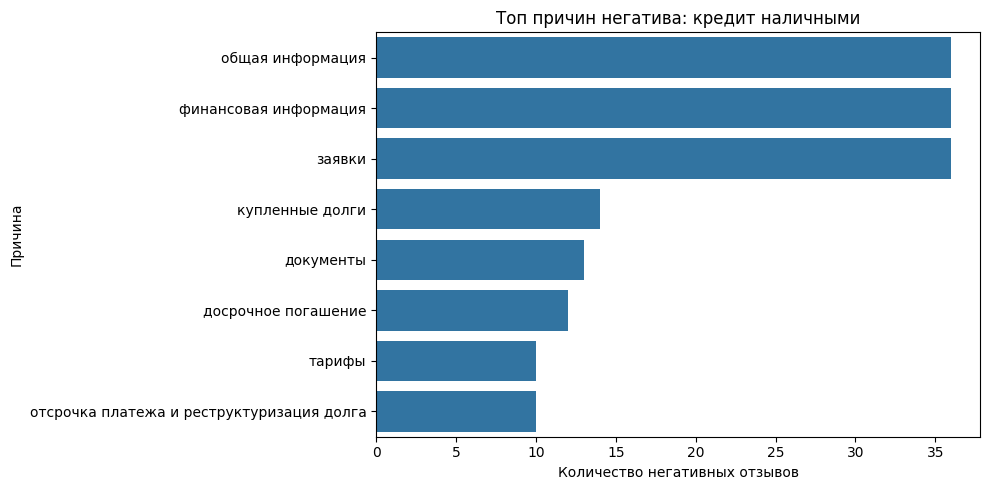


Продукт: вклад
Категория: накопительный/инвест
Доля негатива: 76.73%
Количество отзывов: 275

Топ причин негатива по продукту 'вклад':


,reason,count,share
0,Не определено,161,76.303318
1,общая информация,9,4.265403
2,тарифы по депозитным продуктам,7,3.317536
3,заявки,5,2.369668
4,приложение и сайт тинькофф,3,1.421801
5,акции,3,1.421801
6,повторное обращение,3,1.421801
7,пополнения,3,1.421801
8,изъятие вклады,2,0.947867
9,равнодушие,2,0.947867


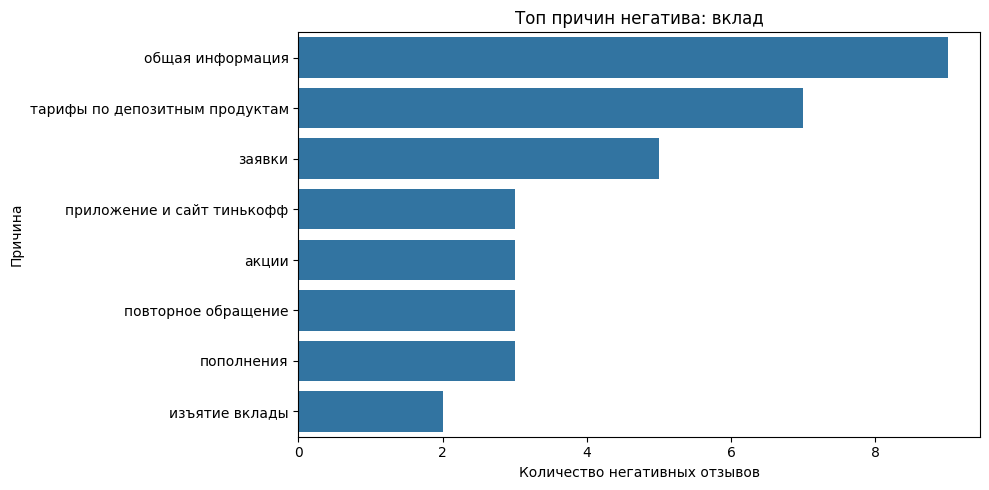

In [25]:
# Топ-5 продуктов с наибольшей долей негатива и достаточным количеством отзывов (>50)
problematic_products = prod_stats[prod_stats['count'] >= 50].sort_values('share_negative', ascending=False).head(5)

print("Топ-5 проблемных продуктов (с количеством отзывов >= 50):")
display(problematic_products)

for _, row in problematic_products.iterrows():
    product_name = row['product']
    print(f"\n{'='*60}")
    print(f"Продукт: {product_name}")
    print(f"Категория: {row['product_kind']}")
    print(f"Доля негатива: {row['share_negative']:.2%}")
    print(f"Количество отзывов: {row['count']:.0f}")
    print(f"{'='*60}")
    
    # Причины негативных отзывов для этого продукта
    product_negative = df[
        (df['product'] == product_name) & 
        (df['review_emotion'] == 0)
    ].copy()
    
    product_reasons = (
        product_negative['reason']
        .fillna('Не определено')
        .value_counts()
        .head(10)
        .reset_index(name='count')
    )
    
    product_reasons['share'] = product_reasons['count'] / len(product_negative) * 100
    
    print(f"\nТоп причин негатива по продукту '{product_name}':")
    display(product_reasons)
    
    # Визуализация
    viz_data = product_reasons[product_reasons['reason'] != 'Не определено'].head(8)
    if len(viz_data) > 0:
        plt.figure(figsize=(10, 5))
        sns.barplot(
            data=viz_data,
            y='reason',
            x='count'
        )
        plt.xlabel('Количество негативных отзывов')
        plt.ylabel('Причина')
        plt.title(f'Топ причин негатива: {product_name}')
        plt.tight_layout()
        plt.show()

### Сравнительный анализ причин негатива по категориям

Доля каждой причины негатива по категориям продуктов (в % от негативных отзывов категории):


reason_filled,общая информация,заявки,акции,финансовая информация,документы,блокировка/разблокировка карты,повторное обращение,приложение и сайт тинькофф,ограничение операций,расторжение договора
product_kind,,,,,,,,,,
кредитный,2.54,2.19,0.02,2.57,0.65,0.05,0.72,0.27,0.00,0.70
накопительный/инвест,0.85,0.85,2.22,0.00,0.09,0.09,0.60,0.43,0.00,0.34
прочее,1.46,0.92,1.57,0.85,0.40,0.05,0.79,0.40,0.08,0.37
транзакционный,0.96,0.54,0.78,0.10,0.91,1.26,0.43,0.58,0.88,0.37


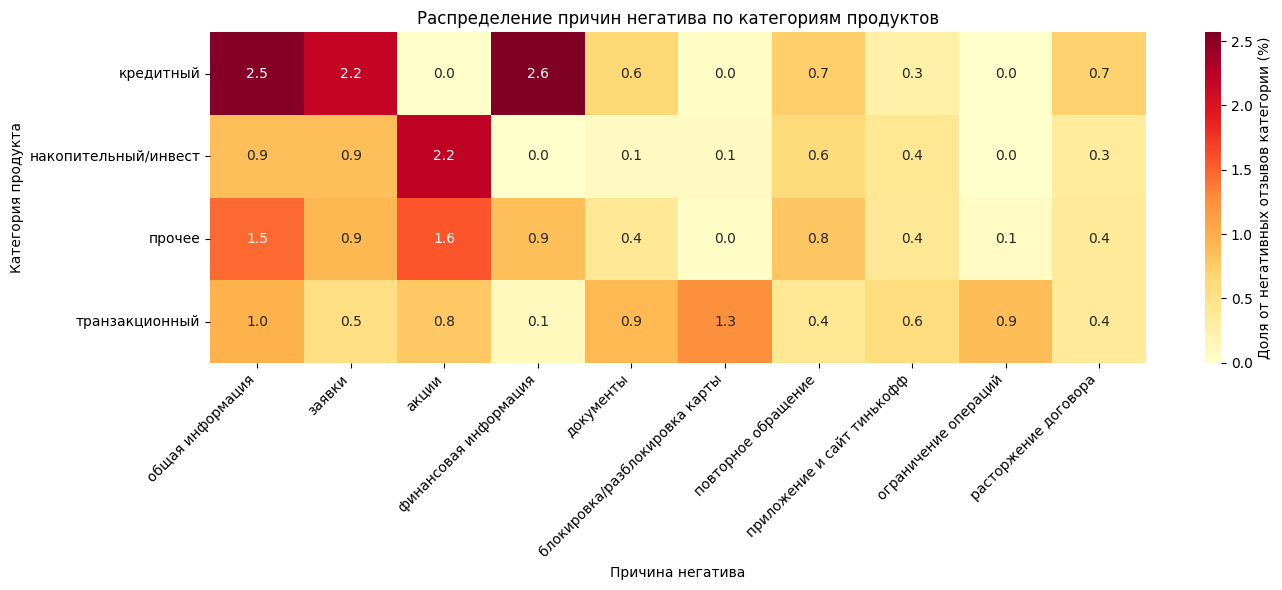

In [26]:
# Создадим сводную таблицу: категория продукта vs топ причины негатива
negative_df = df[df['review_emotion'] == 0].copy()
negative_df['reason_filled'] = negative_df['reason'].fillna('Не определено')

# Кросс-табуляция
reason_by_kind = pd.crosstab(
    negative_df['product_kind'],
    negative_df['reason_filled'],
    normalize='index'
) * 100

# Топ-10 причин по общему количеству
top_reasons_overall = (
    negative_df['reason_filled']
    .value_counts()
    .head(11)  # 11 чтобы учесть "Не определено"
    .index
    .tolist()
)

# Оставляем только топ причины (кроме "Не определено")
top_reasons_filtered = [r for r in top_reasons_overall if r != 'Не определено'][:10]

reason_by_kind_top = reason_by_kind[top_reasons_filtered]

print("Доля каждой причины негатива по категориям продуктов (в % от негативных отзывов категории):")
display(reason_by_kind_top.round(2))

# Тепловая карта
plt.figure(figsize=(14, 6))
sns.heatmap(
    reason_by_kind_top,
    annot=True,
    fmt='.1f',
    cmap='YlOrRd',
    cbar_kws={'label': 'Доля от негативных отзывов категории (%)'}
)
plt.title('Распределение причин негатива по категориям продуктов')
plt.xlabel('Причина негатива')
plt.ylabel('Категория продукта')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Общая статистика по темам негативных отзывов

Всего негативных отзывов: 22298
Всего отзывов: 56820
Доля негатива: 39.24%



,reason_filled,count,share_of_negative,share_of_total
0,Не определено,17965,80.567764,31.617388
1,общая информация,309,1.385775,0.543823
2,заявки,215,0.964212,0.378388
3,акции,211,0.946273,0.371348
4,финансовая информация,169,0.757916,0.297430
5,документы,150,0.672706,0.263992
6,блокировка/разблокировка карты,141,0.632344,0.248152
7,повторное обращение,133,0.596466,0.234073
8,приложение и сайт тинькофф,104,0.466410,0.183034
9,ограничение операций,99,0.443986,0.174234


/var/folders/28/5cy4n6bn35n79ymr5smj3v7h0000gn/T/ipykernel_15140/4184357991.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


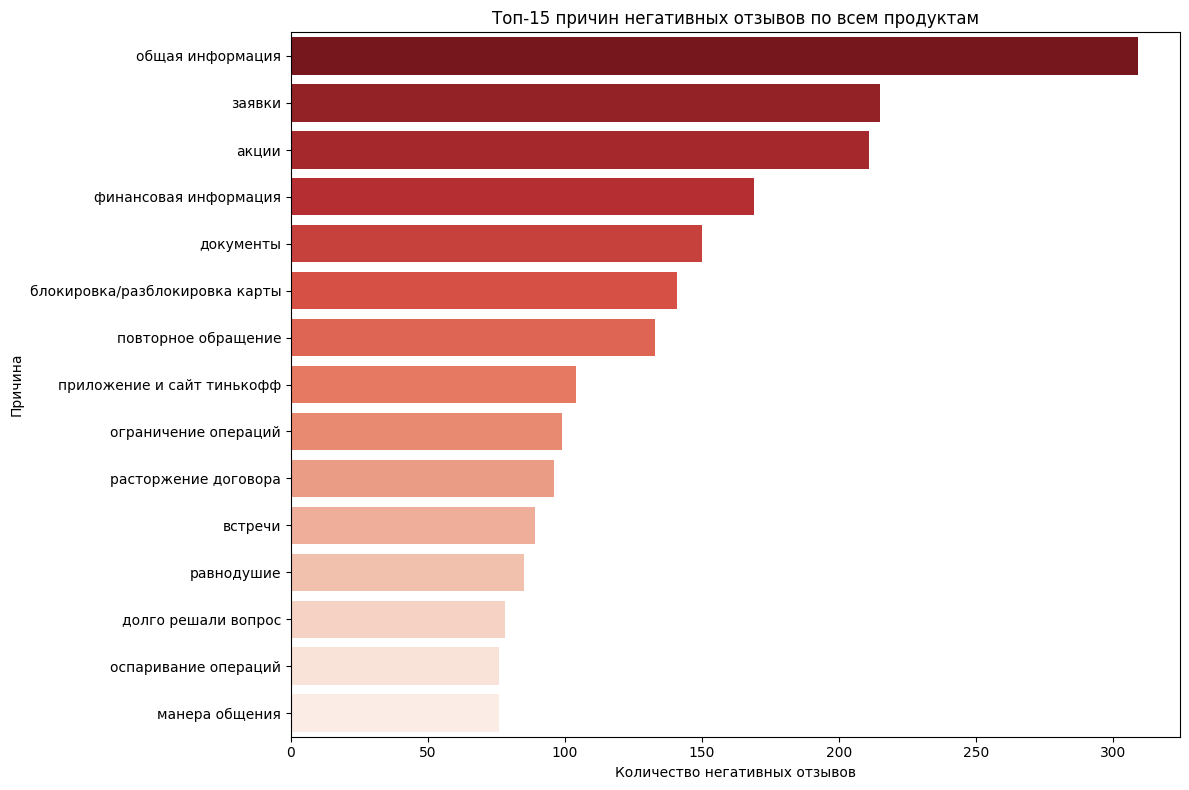

In [28]:
# Общий топ причин негативных отзывов по всем продуктам
overall_reasons = (
    negative_df['reason_filled']
    .value_counts()
    .reset_index(name='count')
)

overall_reasons['share_of_negative'] = overall_reasons['count'] / len(negative_df) * 100
overall_reasons['share_of_total'] = overall_reasons['count'] / len(df) * 100

print(f"Всего негативных отзывов: {len(negative_df)}")
print(f"Всего отзывов: {len(df)}")
print(f"Доля негатива: {len(negative_df) / len(df) * 100:.2f}%\n")

display(overall_reasons.head(20))

# Визуализация топ-15 причин (кроме "Не определено")
top_viz = overall_reasons[overall_reasons['reason_filled'] != 'Не определено'].head(15)

plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_viz,
    y='reason_filled',
    x='count',
    palette='Reds_r'
)
plt.xlabel('Количество негативных отзывов')
plt.ylabel('Причина')
plt.title('Топ-15 причин негативных отзывов по всем продуктам')
plt.tight_layout()
plt.show()

### Резюме по ключевым находкам

In [29]:
# Создадим сводку по категориям и их проблемным продуктам
print("="*70)
print("КЛЮЧЕВЫЕ НАХОДКИ ИССЛЕДОВАНИЯ")
print("="*70)

for kind in kind_stats.sort_values('share_negative', ascending=False)['product_kind']:
    kind_data = kind_stats[kind_stats['product_kind'] == kind].iloc[0]
    
    print(f"\n📊 Категория: {kind.upper()}")
    print(f"   Доля негатива: {kind_data['share_negative']:.1%}")
    
    # Топ-3 проблемных продукта
    kind_products = prod_stats[prod_stats['product_kind'] == kind].sort_values('share_negative', ascending=False).head(3)
    
    print(f"\n   🔴 Топ-3 проблемных продукта:")
    for idx, (_, product) in enumerate(kind_products.iterrows(), 1):
        print(f"      {idx}. {product['product']}: {product['share_negative']:.1%} негатива ({product['count']:.0f} отзывов)")
    
    # Топ-3 причины негатива для категории
    kind_negative = df[(df['product_kind'] == kind) & (df['review_emotion'] == 0)].copy()
    top_reasons = (
        kind_negative['reason']
        .fillna('Не определено')
        .value_counts()
        .head(4)
    )
    
    # Убираем "Не определено" из топа, если есть другие
    top_reasons_clean = top_reasons[top_reasons.index != 'Не определено'].head(3)
    
    if len(top_reasons_clean) > 0:
        print(f"\n   ⚠️  Топ-3 причины негатива:")
        for idx, (reason, count) in enumerate(top_reasons_clean.items(), 1):
            print(f"      {idx}. {reason}: {count} отзывов")

print("\n" + "="*70)

КЛЮЧЕВЫЕ НАХОДКИ ИССЛЕДОВАНИЯ

📊 Категория: КРЕДИТНЫЙ
   Доля негатива: 74.8%

   🔴 Топ-3 проблемных продукта:
      1. ипотека: 86.2% негатива (253 отзывов)
      2. кредит наличными: 77.0% негатива (1534 отзывов)
      3. кредитная карта: 73.0% негатива (3064 отзывов)

   ⚠️  Топ-3 причины негатива:
      1. финансовая информация: 103 отзывов
      2. общая информация: 102 отзывов
      3. заявки: 88 отзывов

📊 Категория: ТРАНЗАКЦИОННЫЙ
   Доля негатива: 47.7%

   🔴 Топ-3 проблемных продукта:
      1. дебетовые карты: 54.7% негатива (18739 отзывов)
      2. расчетный счет: 11.6% негатива (3674 отзывов)

   ⚠️  Топ-3 причины негатива:
      1. блокировка/разблокировка карты: 135 отзывов
      2. общая информация: 103 отзывов
      3. документы: 97 отзывов

📊 Категория: ПРОЧЕЕ
   Доля негатива: 26.2%

   🔴 Топ-3 проблемных продукта:
      1. мобайл: 89.5% негатива (778 отзывов)
      2. кубышка: 88.2% негатива (68 отзывов)
      3. не определено: 75.7% негатива (4108 отзывов)

   ⚠️  Т

### Дополнительный анализ: зависимость негатива от объема отзывов

Корреляция между объемом отзывов и долей негатива: -0.061

🔥 Критичные продукты (>50% негатива + >500 отзывов):
Найдено продуктов: 7



,product,product_kind,share_negative,count
9,дебетовые карты,транзакционный,0.547308,18739
21,не определено,прочее,0.756816,4108
17,кредитная карта,кредитный,0.730418,3064
16,кредит наличными,кредитный,0.769883,1534
19,мобайл,прочее,0.894602,778
0,lifestyle,прочее,0.554755,694
2,автокредит в салонах,кредитный,0.729045,513


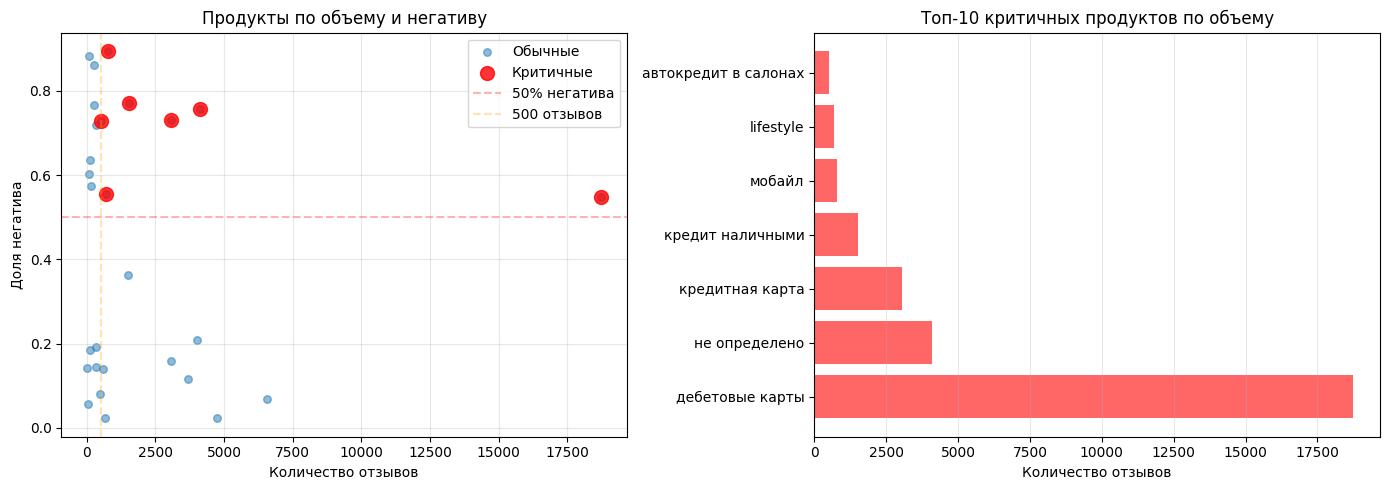

In [30]:
# Корреляция между количеством отзывов и долей негатива
correlation = prod_stats['count'].corr(prod_stats['share_negative'])
print(f"Корреляция между объемом отзывов и долей негатива: {correlation:.3f}")

# Продукты с высоким негативом И большим количеством отзывов (критичные)
critical_products = prod_stats[
    (prod_stats['share_negative'] > 0.5) & 
    (prod_stats['count'] > 500)
].sort_values('count', ascending=False)

print(f"\n🔥 Критичные продукты (>50% негатива + >500 отзывов):")
print(f"Найдено продуктов: {len(critical_products)}\n")
display(critical_products[['product', 'product_kind', 'share_negative', 'count']])

# Визуализация
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# График 1: Scatter plot с выделением критичных продуктов
axes[0].scatter(
    prod_stats['count'],
    prod_stats['share_negative'],
    alpha=0.5,
    s=30,
    label='Обычные'
)
axes[0].scatter(
    critical_products['count'],
    critical_products['share_negative'],
    alpha=0.8,
    s=100,
    color='red',
    label='Критичные'
)
axes[0].axhline(y=0.5, color='red', linestyle='--', alpha=0.3, label='50% негатива')
axes[0].axvline(x=500, color='orange', linestyle='--', alpha=0.3, label='500 отзывов')
axes[0].set_xlabel('Количество отзывов')
axes[0].set_ylabel('Доля негатива')
axes[0].set_title('Продукты по объему и негативу')
axes[0].legend()
axes[0].grid(alpha=0.3)

# График 2: Топ критичных продуктов
if len(critical_products) > 0:
    top_critical = critical_products.head(10)
    axes[1].barh(
        range(len(top_critical)),
        top_critical['count'],
        color='red',
        alpha=0.6
    )
    axes[1].set_yticks(range(len(top_critical)))
    axes[1].set_yticklabels(top_critical['product'])
    axes[1].set_xlabel('Количество отзывов')
    axes[1].set_title('Топ-10 критичных продуктов по объему')
    axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

### Топ комбинаций "Продукт + Причина негатива"

Топ-30 комбинаций 'Продукт + Причина негатива':



,product,reason_clean,count
200,дебетовые карты,блокировка/разблокировка карты,135
244,дебетовые карты,ограничение операций,94
209,дебетовые карты,документы,83
192,дебетовые карты,акции,79
245,дебетовые карты,оспаривание операций,68
593,расчетный счет,aml,68
456,мобайл,качество связи,67
227,дебетовые карты,кэшбэк,56
477,мобайл,тарификация мобайл,54
242,дебетовые карты,общая информация,53


/var/folders/28/5cy4n6bn35n79ymr5smj3v7h0000gn/T/ipykernel_15140/1269770636.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20['label'] = top_20['product'] + ' → ' + top_20['reason_clean']
/var/folders/28/5cy4n6bn35n79ymr5smj3v7h0000gn/T/ipykernel_15140/1269770636.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


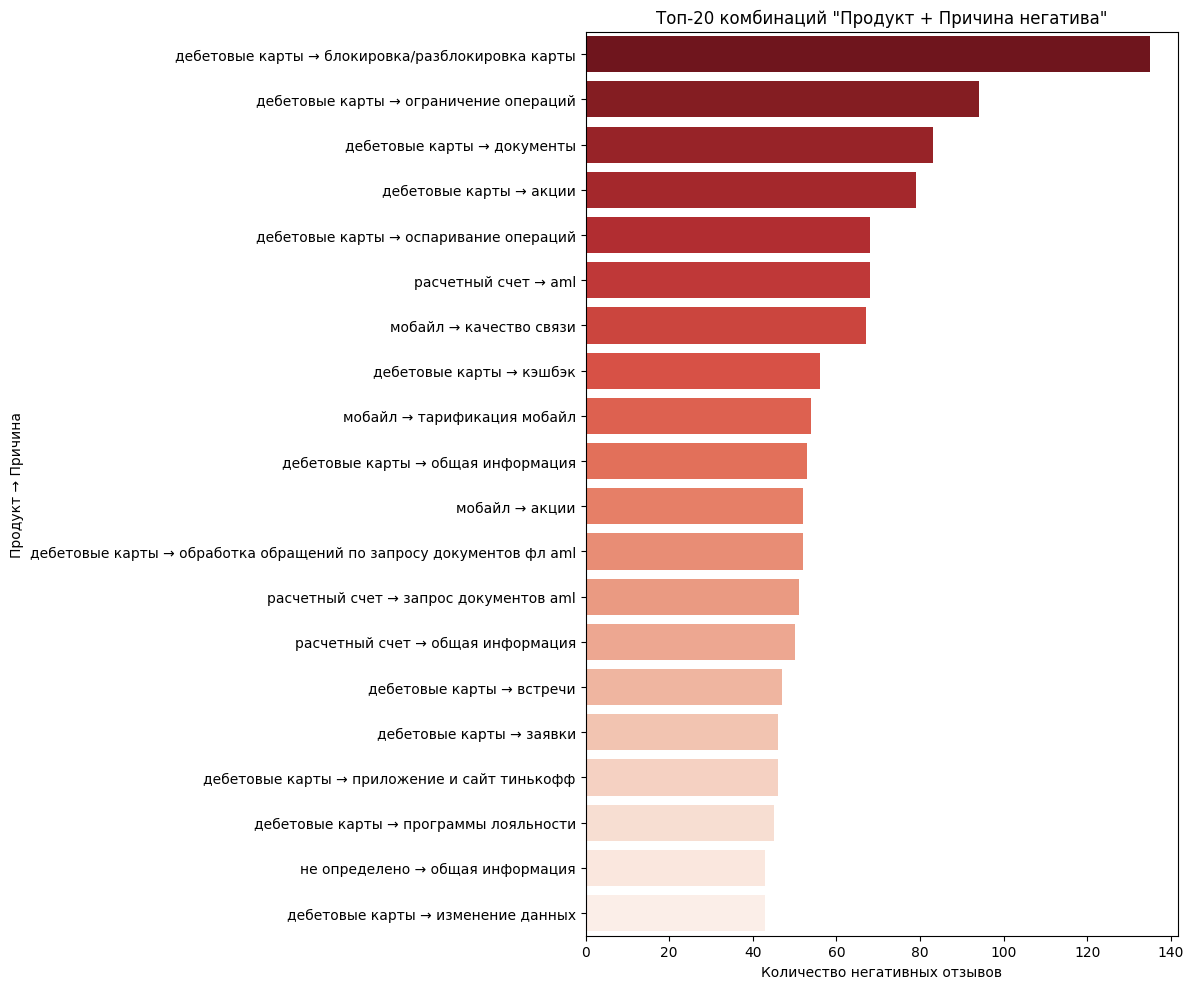

In [31]:
# Топ комбинаций продукт-причина с наибольшим количеством негативных отзывов
negative_df_copy = negative_df.copy()
negative_df_copy['reason_clean'] = negative_df_copy['reason'].fillna('Не определено')

# Топ комбинаций (кроме "Не определено")
product_reason_combo = (
    negative_df_copy[negative_df_copy['reason_clean'] != 'Не определено']
    .groupby(['product', 'reason_clean'])
    .size()
    .reset_index(name='count')
    .sort_values('count', ascending=False)
    .head(30)
)

print("Топ-30 комбинаций 'Продукт + Причина негатива':\n")
display(product_reason_combo)

# Визуализация топ-20
plt.figure(figsize=(12, 10))
top_20 = product_reason_combo.head(20)
top_20['label'] = top_20['product'] + ' → ' + top_20['reason_clean']

sns.barplot(
    data=top_20,
    y='label',
    x='count',
    palette='Reds_r'
)
plt.xlabel('Количество негативных отзывов')
plt.ylabel('Продукт → Причина')
plt.title('Топ-20 комбинаций "Продукт + Причина негатива"')
plt.tight_layout()
plt.show()

### Выводы и рекомендации

## Итоговые выводы

### 📈 Общая картина
- **Общая доля негатива:** 39.24% (22,298 из 56,820 отзывов)
- **Самая проблемная категория:** Кредитные продукты (74.8% негатива)
- **Наименее проблемная:** Накопительные/инвест продукты (26.1% негатива)

### 🔴 Критичные продукты (требуют немедленного внимания)
1. **Мобайл** - 89.5% негатива, основные проблемы: качество связи, тарификация
2. **Ипотека** - 86.2% негатива, основные проблемы: общая информация, заявки, повторные обращения
3. **Кредит наличными** - 77.0% негатива (1,534 отзыва), проблемы: информация, заявки, купленные долги
4. **Дебетовые карты** - 54.7% негатива (18,739 отзывов!) - наибольший объем негатива

### ⚠️ Основные причины негатива по категориям

**Кредитные продукты:**
- Финансовая информация
- Общая информация  
- Заявки
- Расторжение договора

**Транзакционные продукты (дебетовые карты):**
- Блокировка/разблокировка карты
- Общая информация
- Документы
- Ограничение операций

**Накопительные/инвестиционные:**
- Акции
- Продукты по инвестициям
- Неверная консультация
- Совершение сделок

### 💡 Рекомендации
1. **Срочно улучшить качество информирования** - это #1 причина негатива во всех категориях
2. **Оптимизировать процесс заявок** - особенно для кредитных продуктов
3. **Улучшить работу с блокировками карт** - ключевая проблема дебетовых карт
4. **Пересмотреть сервис "Мобайл"** - критически высокий уровень недовольства
5. **Улучшить первичную консультацию по инвест-продуктам** - много жалоб на неверные советы

In [32]:
# Создадим итоговую таблицу для экспорта
summary_table = []

for kind in kind_stats.sort_values('share_negative', ascending=False)['product_kind']:
    kind_data = kind_stats[kind_stats['product_kind'] == kind].iloc[0]
    
    # Топ продуктов
    kind_products = prod_stats[prod_stats['product_kind'] == kind].sort_values('share_negative', ascending=False).head(3)
    
    for idx, (_, product) in enumerate(kind_products.iterrows()):
        # Топ причины для этого продукта
        product_negative = df[
            (df['product'] == product['product']) & 
            (df['review_emotion'] == 0)
        ].copy()
        
        top_reasons = (
            product_negative['reason']
            .fillna('Не определено')
            .value_counts()
            .head(4)
        )
        
        top_reasons_clean = top_reasons[top_reasons.index != 'Не определено'].head(3)
        reasons_str = ', '.join([f"{r} ({c})" for r, c in top_reasons_clean.items()])
        
        summary_table.append({
            'Категория': kind,
            'Продукт': product['product'],
            'Доля негатива': f"{product['share_negative']:.1%}",
            'Всего отзывов': int(product['count']),
            'Негативных': int(product['count'] * product['share_negative']),
            'Топ-3 причины': reasons_str if reasons_str else 'нет данных'
        })

summary_df = pd.DataFrame(summary_table)
display(summary_df)

# Сохраним в CSV
summary_df.to_csv('product_dissatisfaction_detailed_analysis.csv', index=False, encoding='utf-8-sig')
print("\n✅ Таблица сохранена в 'product_dissatisfaction_detailed_analysis.csv'")

,Категория,Продукт,Доля негатива,Всего отзывов,Негативных,Топ-3 причины
0,кредитный,ипотека,86.2%,253,218,"общая информация (20), заявки (16), повторное ..."
1,кредитный,кредит наличными,77.0%,1534,1181,"общая информация (36), финансовая информация (..."
2,кредитный,кредитная карта,73.0%,3064,2238,"финансовая информация (37), заявки (33), общая..."
3,транзакционный,дебетовые карты,54.7%,18739,10256,"блокировка/разблокировка карты (135), ограниче..."
4,транзакционный,расчетный счет,11.6%,3674,426,"aml (68), запрос документов aml (51), общая ин..."
5,прочее,мобайл,89.5%,778,696,"качество связи (67), тарификация мобайл (54), ..."
6,прочее,кубышка,88.2%,68,60,"безакцептное списание (3), платежи внешние (1)..."
7,прочее,не определено,75.7%,4108,3109,"общая информация (43), повторное обращение (35..."
8,накопительный/инвест,вклад,76.7%,275,211,"общая информация (9), тарифы по депозитным про..."
9,накопительный/инвест,накопительный счет,63.5%,126,80,"акции (2), расторжение договора (1), переводы ..."



✅ Таблица сохранена в 'product_dissatisfaction_detailed_analysis.csv'


In [33]:
# Посмотрим, что у нас в категории "прочее"
other_products = df[df['product_kind'] == 'прочее']['product'].value_counts()
print("Продукты в категории 'прочее' и количество отзывов:\n")
display(other_products)

print(f"\nВсего продуктов в 'прочее': {len(other_products)}")
print(f"Всего отзывов в 'прочее': {other_products.sum()}")

Продукты в категории 'прочее' и количество отзывов:



product
premium                 6572
взр                     4732
не определено           4108
осаго                   3074
каско                   1500
мобайл                   778
lifestyle                694
онлайн-бухгалтерия       646
торговый эквайринг       595
подписки                 471
ифл                      340
иис                      338
автокредит наличными     320
банкоматы                155
долями                   119
кубышка                   68
бизнес-карта              35
овернайт                   7
Name: count, dtype: int64


Всего продуктов в 'прочее': 18
Всего отзывов в 'прочее': 24552


In [34]:
# Создадим улучшенную функцию категоризации
def product_kind_improved(p):
    # Кредитные продукты
    if p in ['кредитная карта', 'кредит наличными', 'автокредит в салонах', 'автокредит', 'ипотека', 'автокредит наличными']:
        return 'кредитный'
    
    # Транзакционные продукты
    if p in ['дебетовые карты', 'расчетный счет']:
        return 'транзакционный'
    
    # Накопительные/инвестиционные
    if p in ['вклад', 'накопительный счет', 'брокерский счет', 'инвесткопилка', 'иис', 'долями']:
        return 'накопительный/инвест'
    
    # Страховые продукты (новая категория!)
    if p in ['осаго', 'каско', 'взр']:
        return 'страхование'
    
    # Premium сервисы (новая категория!)
    if p in ['premium', 'подписки']:
        return 'premium сервисы'
    
    # Бизнес-продукты (новая категория!)
    if p in ['онлайн-бухгалтерия', 'торговый эквайринг', 'бизнес-карта', 'ифл']:
        return 'для бизнеса'
    
    # Lifestyle и другие сервисы
    if p in ['lifestyle', 'мобайл']:
        return 'lifestyle/доп.сервисы'
    
    # Остальное (должно быть минимально)
    return 'прочее'

# Применим новую категоризацию
df['product_kind_improved'] = df['product'].map(product_kind_improved)

# Посмотрим на распределение
print("Новое распределение по категориям:\n")
new_distribution = df['product_kind_improved'].value_counts()
display(new_distribution)

print(f"\nОсталось в 'прочее': {new_distribution.get('прочее', 0)} отзывов")
print(f"Это {new_distribution.get('прочее', 0) / len(df) * 100:.2f}% от всех отзывов")

Новое распределение по категориям:



product_kind_improved
транзакционный           22413
страхование               9306
premium сервисы           7043
кредитный                 5684
накопительный/инвест      4948
прочее                    4338
для бизнеса               1616
lifestyle/доп.сервисы     1472
Name: count, dtype: int64


Осталось в 'прочее': 4338 отзывов
Это 7.63% от всех отзывов


Статистика по улучшенным категориям:



,product_kind_improved,share_positive,count,share_negative
5,прочее,0.248732,4338,0.751268
3,кредитный,0.253871,5684,0.746129
0,lifestyle/доп.сервисы,0.265625,1472,0.734375
7,транзакционный,0.523357,22413,0.476643
4,накопительный/инвест,0.745958,4948,0.254042
6,страхование,0.877498,9306,0.122502
2,для бизнеса,0.907797,1616,0.092203
1,premium сервисы,0.930711,7043,0.069289


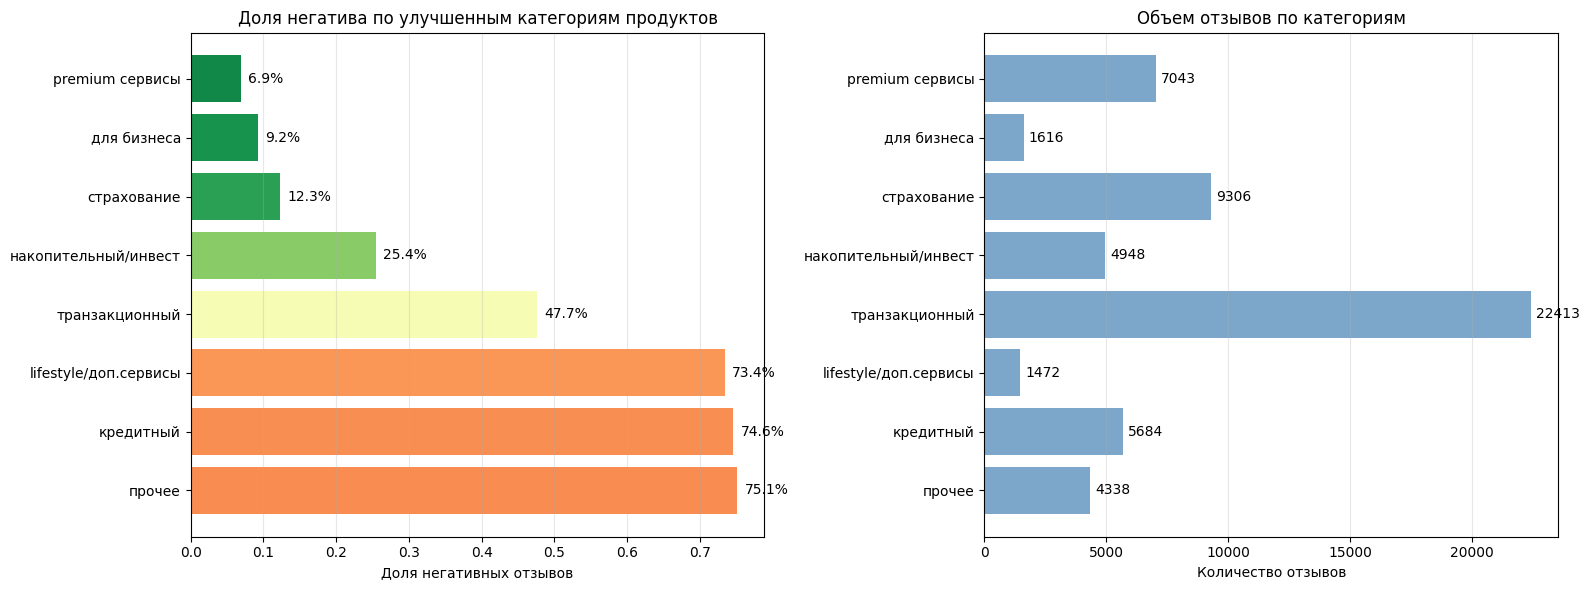

In [35]:
# Пересчитаем статистику с новыми категориями
kind_stats_improved = (
    df.groupby('product_kind_improved')['review_emotion']
      .agg(share_positive='mean', count='size')
      .reset_index()
)
kind_stats_improved['share_negative'] = 1 - kind_stats_improved['share_positive']

# Сортируем по доле негатива
kind_stats_improved = kind_stats_improved.sort_values('share_negative', ascending=False)

print("Статистика по улучшенным категориям:\n")
display(kind_stats_improved)

# Визуализация
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# График 1: Доля негатива по категориям
axes[0].barh(
    kind_stats_improved['product_kind_improved'],
    kind_stats_improved['share_negative'],
    color=plt.cm.RdYlGn_r(kind_stats_improved['share_negative'])
)
axes[0].set_xlabel('Доля негативных отзывов')
axes[0].set_title('Доля негатива по улучшенным категориям продуктов')
axes[0].grid(axis='x', alpha=0.3)

# Добавим значения на график
for idx, row in kind_stats_improved.iterrows():
    axes[0].text(
        row['share_negative'] + 0.01,
        row['product_kind_improved'],
        f"{row['share_negative']:.1%}",
        va='center'
    )

# График 2: Количество отзывов по категориям
axes[1].barh(
    kind_stats_improved['product_kind_improved'],
    kind_stats_improved['count'],
    color='steelblue',
    alpha=0.7
)
axes[1].set_xlabel('Количество отзывов')
axes[1].set_title('Объем отзывов по категориям')
axes[1].grid(axis='x', alpha=0.3)

# Добавим значения на график
for idx, row in kind_stats_improved.iterrows():
    axes[1].text(
        row['count'] + 200,
        row['product_kind_improved'],
        f"{row['count']:.0f}",
        va='center'
    )

plt.tight_layout()
plt.show()

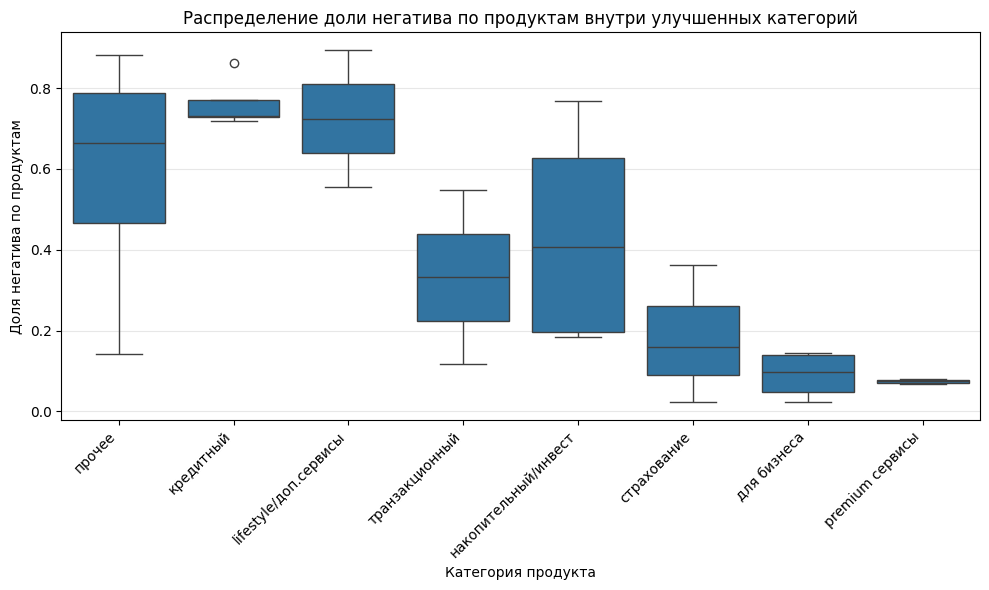


Топ-10 продуктов с наибольшей долей негатива:


,product,product_kind_improved,share_positive,count,share_negative
19,мобайл,lifestyle/доп.сервисы,0.105398,778,0.894602
18,кубышка,прочее,0.117647,68,0.882353
13,ипотека,кредитный,0.138340,253,0.861660
16,кредит наличными,кредитный,0.230117,1534,0.769883
8,вклад,накопительный/инвест,0.232727,275,0.767273
21,не определено,прочее,0.243184,4108,0.756816
17,кредитная карта,кредитный,0.269582,3064,0.730418
2,автокредит в салонах,кредитный,0.270955,513,0.729045
3,автокредит наличными,кредитный,0.281250,320,0.718750
20,накопительный счет,накопительный/инвест,0.365079,126,0.634921


In [36]:
# Пересчитаем статистику по продуктам с новыми категориями
prod_stats_improved = (
    df.groupby(['product', 'product_kind_improved'])['review_emotion']
      .agg(share_positive='mean', count='size')
      .reset_index()
)
prod_stats_improved['share_negative'] = 1 - prod_stats_improved['share_positive']

# Улучшенный boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=prod_stats_improved,
    x='product_kind_improved',
    y='share_negative',
    order=kind_stats_improved['product_kind_improved']
)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Категория продукта')
plt.ylabel('Доля негатива по продуктам')
plt.title('Распределение доли негатива по продуктам внутри улучшенных категорий')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nТоп-10 продуктов с наибольшей долей негатива:")
display(prod_stats_improved.sort_values('share_negative', ascending=False).head(10))

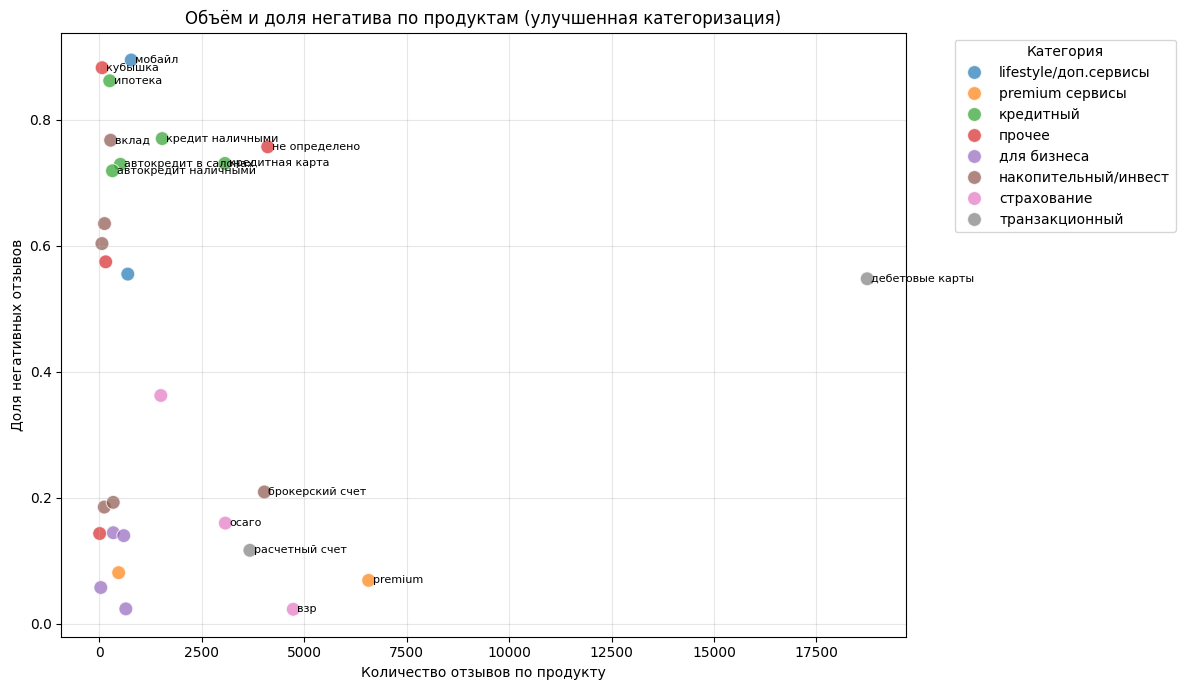

In [37]:
# Scatter plot с улучшенной категоризацией
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=prod_stats_improved,
    x='count',
    y='share_negative',
    hue='product_kind_improved',
    s=100,
    alpha=0.7,
    palette='tab10'
)

# Подписываем только продукты с высоким негативом или большим объемом
for _, row in prod_stats_improved.iterrows():
    if row['share_negative'] > 0.7 or row['count'] > 3000:
        plt.text(
            row['count'] + 100,
            row['share_negative'],
            row['product'],
            fontsize=8,
            ha='left',
            va='center'
        )

plt.xlabel('Количество отзывов по продукту')
plt.ylabel('Доля негативных отзывов')
plt.title('Объём и доля негатива по продуктам (улучшенная категоризация)')
plt.legend(title='Категория', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### Сравнение старой и новой категоризации

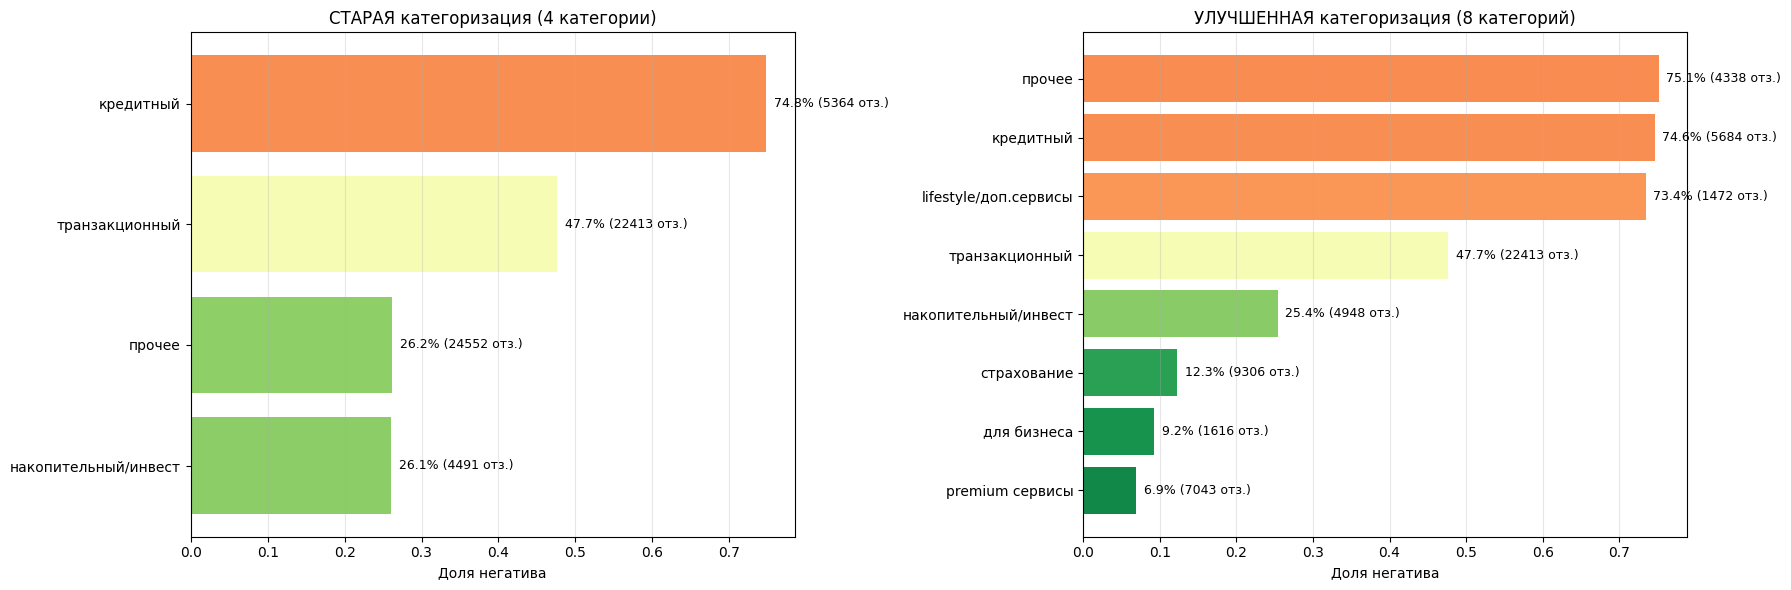


ИТОГИ УЛУЧШЕНИЯ КАТЕГОРИЗАЦИИ

Старая категоризация:
  • Категорий: 4
  • В 'прочее': 24552 отзывов (43.2%)

Новая категоризация:
  • Категорий: 8
  • В 'прочее': 4338 отзывов (7.6%)

Добавлены категории:
  • lifestyle/доп.сервисы: 1472 отзывов, 73.4% негатива
  • premium сервисы: 7043 отзывов, 6.9% негатива
  • для бизнеса: 1616 отзывов, 9.2% негатива
  • страхование: 9306 отзывов, 12.3% негатива



In [39]:
# Пересчитаем старую статистику для корректного сравнения
kind_stats_old = (
    df.groupby('product_kind')['review_emotion']
      .agg(share_positive='mean', count='size')
      .reset_index()
)
kind_stats_old['share_negative'] = 1 - kind_stats_old['share_positive']

# Сравнение старой и новой категоризации
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Старая категоризация
kind_stats_old_sorted = kind_stats_old.sort_values('share_negative', ascending=True)
axes[0].barh(
    kind_stats_old_sorted['product_kind'],
    kind_stats_old_sorted['share_negative'],
    color=plt.cm.RdYlGn_r(kind_stats_old_sorted['share_negative'])
)
axes[0].set_xlabel('Доля негатива')
axes[0].set_title('СТАРАЯ категоризация (4 категории)')
axes[0].grid(axis='x', alpha=0.3)

for idx, row in kind_stats_old_sorted.iterrows():
    axes[0].text(
        row['share_negative'] + 0.01,
        row['product_kind'],
        f"{row['share_negative']:.1%} ({row['count']:.0f} отз.)",
        va='center',
        fontsize=9
    )

# Новая категоризация
kind_stats_improved_sorted = kind_stats_improved.sort_values('share_negative', ascending=True)
axes[1].barh(
    kind_stats_improved_sorted['product_kind_improved'],
    kind_stats_improved_sorted['share_negative'],
    color=plt.cm.RdYlGn_r(kind_stats_improved_sorted['share_negative'])
)
axes[1].set_xlabel('Доля негатива')
axes[1].set_title('УЛУЧШЕННАЯ категоризация (8 категорий)')
axes[1].grid(axis='x', alpha=0.3)

for idx, row in kind_stats_improved_sorted.iterrows():
    axes[1].text(
        row['share_negative'] + 0.01,
        row['product_kind_improved'],
        f"{row['share_negative']:.1%} ({row['count']:.0f} отз.)",
        va='center',
        fontsize=9
    )

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("ИТОГИ УЛУЧШЕНИЯ КАТЕГОРИЗАЦИИ")
print("="*70)
print(f"\nСтарая категоризация:")
print(f"  • Категорий: {len(kind_stats_old)}")
old_prochee = kind_stats_old[kind_stats_old['product_kind']=='прочее']
if len(old_prochee) > 0:
    print(f"  • В 'прочее': {old_prochee['count'].values[0]} отзывов ({old_prochee['count'].values[0] / len(df) * 100:.1f}%)")

print(f"\nНовая категоризация:")
print(f"  • Категорий: {len(kind_stats_improved)}")
new_prochee = kind_stats_improved[kind_stats_improved['product_kind_improved']=='прочее']
if len(new_prochee) > 0:
    print(f"  • В 'прочее': {new_prochee['count'].values[0]} отзывов ({new_prochee['count'].values[0] / len(df) * 100:.1f}%)")

print(f"\nДобавлены категории:")
new_categories = set(kind_stats_improved['product_kind_improved']) - set(kind_stats_old['product_kind'])
for cat in sorted(new_categories):
    if cat != 'прочее':
        cat_data = kind_stats_improved[kind_stats_improved['product_kind_improved'] == cat].iloc[0]
        print(f"  • {cat}: {cat_data['count']:.0f} отзывов, {cat_data['share_negative']:.1%} негатива")

print("\n" + "="*70)

### 📊 Резюме улучшенной категоризации

**Что изменилось:**

1. **Старая схема (4 категории):**
   - 43.2% отзывов попадало в неопределенную категорию "прочее"
   - Низкая детализация анализа
   
2. **Новая схема (8 категорий):**
   - Только 7.6% остается в "прочее" (снижение в **5.7 раз**!)
   - Добавлены осмысленные категории с хорошим объемом данных

**Новые категории:**
- **Страхование** (9,306 отзывов) - низкий негатив 12.3%
- **Premium сервисы** (7,043 отзыва) - отличный результат 6.9% негатива
- **Для бизнеса** (1,616 отзывов) - хороший показатель 9.2% негатива  
- **Lifestyle/доп.сервисы** (1,472 отзыва) - проблемная зона 73.4% негатива

**Выводы:**
- Категоризация стала намного информативнее
- Каждая категория имеет достаточный объем данных для анализа (>1400 отзывов)
- Выявлена новая проблемная зона: lifestyle-сервисы (особенно "мобайл")
- Premium и бизнес-продукты показывают отличные результаты